In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  

import warnings
warnings.filterwarnings("ignore")
# 显示汉字
plt.rcParams['font.sans-serif']=['SimHei']   
plt.rcParams['axes.unicode_minus'] = False
# %config InlineBackend.figure_format = 'svg'  # 矢量格式，最清晰

### 合并附件1、附件2

In [2]:
import pandas as pd

industries = pd.read_excel('data\附件1.xlsx')
# 股票代码转换成int类型方便join，合并附件一、附件二
industries['股票代码'] = industries['股票代码'].astype(int)
industries.head()

,股票代码,所属行业
0,4019,制造业
1,4213,制造业
2,8166,制造业
3,9063,批发和零售业
4,10083,信息传输、软件和信息技术服务业


In [3]:
df = pd.read_csv('data\附件2.csv')
df = pd.merge(df, industries, left_on='TICKER_SYMBOL', right_on='股票代码', how='inner')
df = df.rename(columns={'所属行业':'Industry'})

In [4]:
df

,TICKER_SYMBOL,ACT_PUBTIME,PUBLISH_DATE,END_DATE_REP,END_DATE,REPORT_TYPE,FISCAL_PERIOD,MERGED_FLAG,ACCOUTING_STANDARDS,CURRENCY_CD,...,INVEN_TURNOVER,FA_TURNOVER,TFA_TURNOVER,DAYS_AP,DAYS_INVEN,TA_TURNOVER,AR_TURNOVER,FLAG,股票代码,Industry
0,4019,3,3,2,1,A,12,1,CHAS_2007,CNY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4019,制造业
1,4019,4,4,3,2,A,12,1,CHAS_2007,CNY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4019,制造业
2,4019,5,5,4,3,A,12,1,CHAS_2007,CNY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4019,制造业
3,4019,6,6,5,4,A,12,1,CHAS_2007,CNY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4019,制造业
4,4019,7,7,6,5,A,12,1,CHAS_2007,CNY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4019,制造业
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20883,4955770,7,7,7,5,A,12,1,CHAS_2007,CNY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4955770,制造业
20884,4955770,7,7,7,6,A,12,1,CHAS_2007,CNY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4955770,制造业
20885,4958289,7,7,7,5,A,12,1,CHAS_2007,CNY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4958289,制造业
20886,4958289,7,7,7,6,A,12,1,CHAS_2007,CNY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4958289,制造业


# 1 数据预处理

## 1.1 删除冗余列

### 查看冗余列唯一值

In [5]:
import pandas as pd


# 获取指定的列
columns_to_check = [
    'ACT_PUBTIME', 'PUBLISH_DATE', 'END_DATE_REP', 'REPORT_TYPE',
    'FISCAL_PERIOD','MERGED_FLAG', 'ACCOUTING_STANDARDS','CURRENCY_CD','END_DATE'
]

# 检查这些列是否存在于数据框中
existing_columns = [col for col in columns_to_check if col in df.columns]
missing_columns = [col for col in columns_to_check if col not in df.columns]

if missing_columns:
    print(f"以下列在数据框中不存在: {missing_columns}")

# 对于每一列，显示数据类型和唯一值
for column in existing_columns:
    print(f"\n列名: {column}")
    print(f"数据类型: {df[column].dtype}")
    
    # 获取唯一值
    unique_values = df[column].unique()
    
    # 如果唯一值太多，只显示前10个
    if len(unique_values) > 10:
        print(f"唯一值 (显示前10个，共{len(unique_values)}个): {unique_values[:10]}")
    else:
        print(f"唯一值 (共{len(unique_values)}个): {unique_values}")
    
    # 显示缺失值的数量和百分比
    missing = df[column].isna().sum()
    missing_percentage = (missing / len(df)) * 100
    print(f"缺失值: {missing} ({missing_percentage:.2f}%)")
    
# 'ACT_PUBTIME' - '实际披露时间'
# 'PUBLISH_DATE' - '发布时间'
# 'END_DATE_REP' - '报告截止日期'
# 'REPORT_TYPE' - '报告类型'
# 'END_DATE' - '截止日期'
# 'FISCAL_PERIOD' - '会计区间'
# 'MERGED_FLAG' - '合并标志'
# 'ACCOUTING_STANDARDS' - '会计准则'
# 'CURRENCY_CD' - '货币代码'
# 报告截止日期不能删


列名: ACT_PUBTIME
数据类型: int64
唯一值 (共6个): [3 4 5 6 7 2]
缺失值: 0 (0.00%)

列名: PUBLISH_DATE
数据类型: int64
唯一值 (共6个): [3 4 5 6 7 2]
缺失值: 0 (0.00%)

列名: END_DATE_REP
数据类型: int64
唯一值 (共7个): [2 3 4 5 6 7 1]
缺失值: 0 (0.00%)

列名: REPORT_TYPE
数据类型: object
唯一值 (共1个): ['A']
缺失值: 0 (0.00%)

列名: FISCAL_PERIOD
数据类型: int64
唯一值 (共1个): [12]
缺失值: 0 (0.00%)

列名: MERGED_FLAG
数据类型: int64
唯一值 (共1个): [1]
缺失值: 0 (0.00%)

列名: ACCOUTING_STANDARDS
数据类型: object
唯一值 (共1个): ['CHAS_2007']
缺失值: 0 (0.00%)

列名: CURRENCY_CD
数据类型: object
唯一值 (共1个): ['CNY']
缺失值: 0 (0.00%)

列名: END_DATE
数据类型: int64
唯一值 (共6个): [1 2 3 4 5 6]
缺失值: 0 (0.00%)


### 删除冗余列

In [6]:
# 删除无用列和单一列 （9列）：“股票代码（中文列）”、“货币代码”、“实际披露时间”、“发布时间”、“报告类型”、“会计区间”、“合并标志”、“会计准则”、“截止日期”
df.drop(columns=['ACT_PUBTIME', 'PUBLISH_DATE', 'REPORT_TYPE', 'FISCAL_PERIOD','MERGED_FLAG', 'ACCOUTING_STANDARDS','CURRENCY_CD','股票代码','END_DATE'], inplace=True)
df

,TICKER_SYMBOL,END_DATE_REP,CASH_C_EQUIV,SETT_PROV,LOAN_TO_OTH_BANK_FI,TRADING_FA,NOTES_RECEIV,AR,PREPAYMENT,PREMIUM_RECEIV,...,OPER_CYCLE,INVEN_TURNOVER,FA_TURNOVER,TFA_TURNOVER,DAYS_AP,DAYS_INVEN,TA_TURNOVER,AR_TURNOVER,FLAG,Industry
0,4019,2,6.719939e+08,NaN,NaN,NaN,1.643520e+08,3.451945e+08,10395215.35,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,制造业
1,4019,3,3.819075e+08,NaN,NaN,NaN,1.517544e+08,2.910801e+08,6944414.85,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,制造业
2,4019,4,4.007627e+08,NaN,NaN,NaN,2.091605e+08,3.656868e+08,13022036.86,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,制造业
3,4019,5,2.568188e+08,NaN,NaN,NaN,3.306339e+08,6.074095e+08,12264175.43,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,制造业
4,4019,6,1.994519e+09,NaN,NaN,NaN,3.929712e+08,5.351709e+08,49915440.13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,制造业
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20883,4955770,7,3.990889e+07,NaN,NaN,NaN,1.200000e+06,1.133573e+08,6473751.28,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,制造业
20884,4955770,7,1.270124e+08,NaN,NaN,NaN,NaN,1.611597e+08,3405198.44,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,制造业
20885,4958289,7,5.365622e+07,NaN,NaN,NaN,NaN,7.826347e+07,675822.06,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,制造业
20886,4958289,7,5.980404e+07,NaN,NaN,NaN,1.000000e+06,1.179930e+08,1098232.79,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,制造业


### 保存文件 - 'output\data.csv'

In [7]:
import os
import pandas as pd

# 创建文件夹
folder_name = 'output'
os.makedirs(folder_name, exist_ok=True)

# 保存文件
file_path = 'output/data.csv'
df.to_csv(file_path, index=False)

print(f'文件已保存至: {file_path}')

文件已保存至: output/data.csv


In [2]:
df = pd.read_csv('output\data.csv')
df

,TICKER_SYMBOL,END_DATE_REP,CASH_C_EQUIV,SETT_PROV,LOAN_TO_OTH_BANK_FI,TRADING_FA,NOTES_RECEIV,AR,PREPAYMENT,PREMIUM_RECEIV,...,OPER_CYCLE,INVEN_TURNOVER,FA_TURNOVER,TFA_TURNOVER,DAYS_AP,DAYS_INVEN,TA_TURNOVER,AR_TURNOVER,FLAG,Industry
0,4019,2,6.719939e+08,NaN,NaN,NaN,1.643520e+08,3.451945e+08,10395215.35,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,制造业
1,4019,3,3.819075e+08,NaN,NaN,NaN,1.517544e+08,2.910801e+08,6944414.85,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,制造业
2,4019,4,4.007627e+08,NaN,NaN,NaN,2.091605e+08,3.656868e+08,13022036.86,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,制造业
3,4019,5,2.568188e+08,NaN,NaN,NaN,3.306339e+08,6.074095e+08,12264175.43,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,制造业
4,4019,6,1.994519e+09,NaN,NaN,NaN,3.929712e+08,5.351709e+08,49915440.13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,制造业
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20883,4955770,7,3.990889e+07,NaN,NaN,NaN,1.200000e+06,1.133573e+08,6473751.28,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,制造业
20884,4955770,7,1.270124e+08,NaN,NaN,NaN,NaN,1.611597e+08,3405198.44,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,制造业
20885,4958289,7,5.365622e+07,NaN,NaN,NaN,NaN,7.826347e+07,675822.06,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,制造业
20886,4958289,7,5.980404e+07,NaN,NaN,NaN,1.000000e+06,1.179930e+08,1098232.79,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,制造业


### 可视化各行业公司数量 - 柱状图

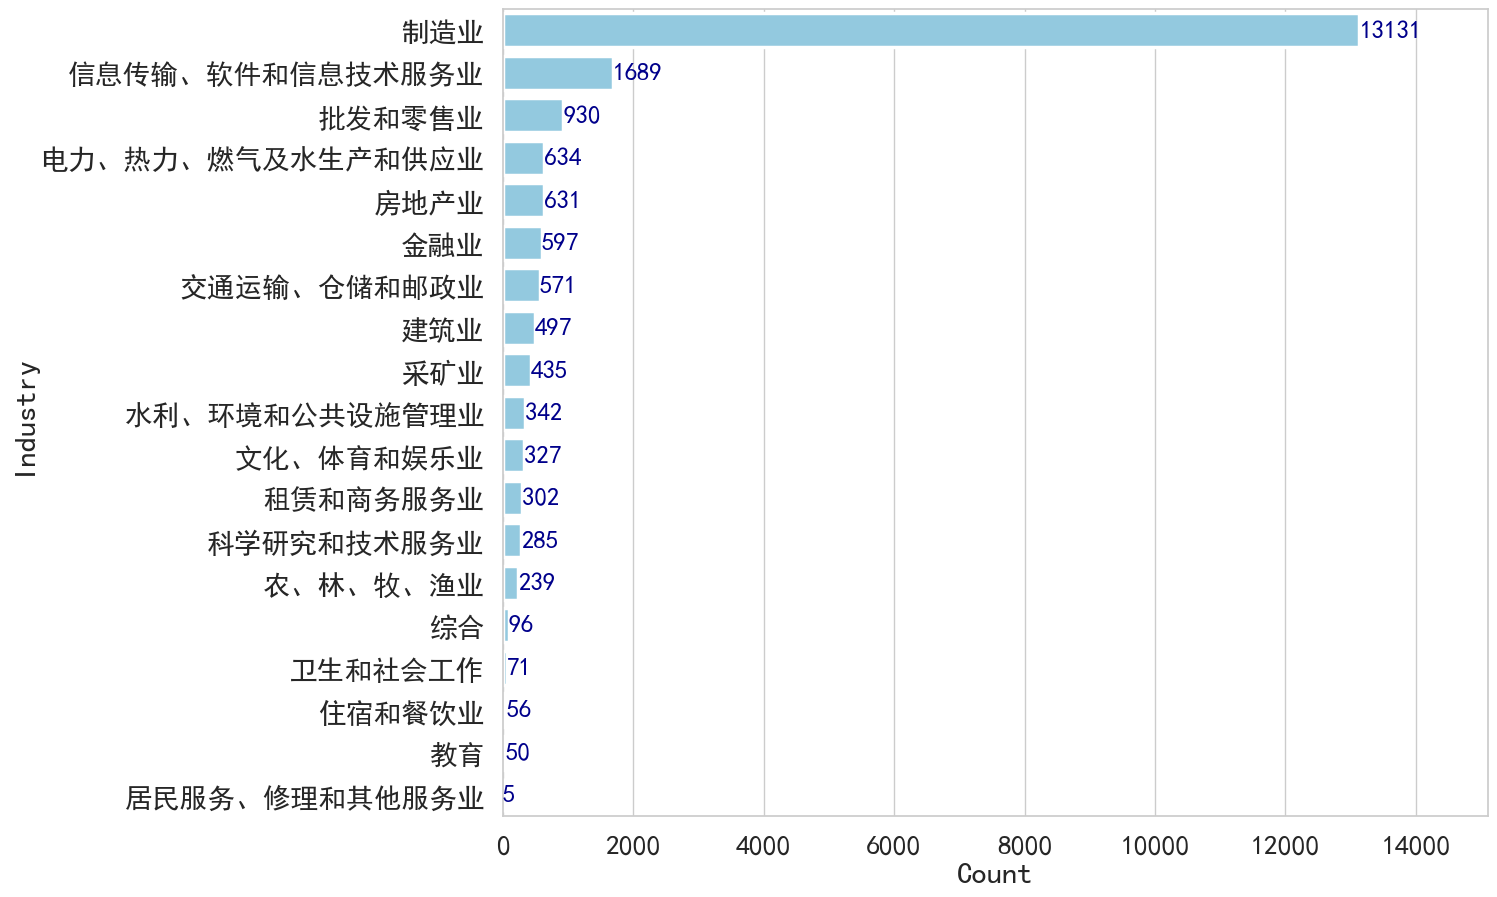

In [17]:
# 各行业数量画柱状图
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置Seaborn的图表样式
sns.set(style="whitegrid")

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号'-'显示为方块的问题

# 增加全局字体大小设置
plt.rcParams['font.size'] = 22  # 增大默认字体大小
plt.rcParams['font.weight'] = 'bold'  # 设置默认字体为粗体

# 统计每个行业的数据条数
industry_counts = df['Industry'].value_counts().reset_index()
industry_counts.columns = ['Industry', 'Count']

# 按照数量进行倒序排序
industry_counts = industry_counts.sort_values(by='Count', ascending=False)

# 绘制水平柱状图 - 增大图像尺寸
plt.figure(figsize=(16, 10))  # 增大图表尺寸以容纳更大的文字

# 设置柱状图的线宽和颜色
sns.barplot(x='Count', y='Industry', data=industry_counts, color='skyblue', 
            orient='h', linewidth=2.5)  # 增加线宽，使轮廓更清晰

# 设置横轴（x轴）的显示范围
max_value = max(industry_counts['Count']) * 1.15  # 增加到1.15以便为更大的文字留出空间
plt.xlim(left=0, right=max_value)

# 添加标题和轴标签，字体加粗放大
#plt.title('每个行业的财务数据条数', fontsize=22, fontweight='bold')  # 标题字体加大加粗
#plt.xlabel('数据条数', fontsize=18, fontweight='bold')  # x轴标签加大加粗
#plt.ylabel('行业', fontsize=18, fontweight='bold')  # y轴标签加大加粗

# 坐标轴刻度字体加大
plt.tick_params(axis='both', which='major', labelsize=20)  # 增大刻度标签尺寸

# 显示数据值在条形图上 - 字体加大加粗
for index, value in enumerate(industry_counts['Count']):
    plt.text(value, index, str(value), va='center', fontsize=18, 
             fontweight='bold', color='darkblue')  # 值标签加大加粗

# 自动调整子图参数，使之填充整个图像区域
plt.tight_layout(pad=2.0)  # 增加边距，避免文字被裁剪

# 增加图像DPI，提高打印质量
plt.savefig('industry_counts.png', dpi=300, bbox_inches='tight')  # 添加保存高分辨率图像

plt.show()

### 查看各行业造假/非造假数量

In [10]:
from tabulate import tabulate

# Flag为1表示造假，Flag为0表示不造假，Flag为空表示未知
fraud_counts = df[df['FLAG'] == 1].groupby('Industry').size().reset_index(name='Fraud_Count')
non_fraud_counts = df[df['FLAG'] == 0].groupby('Industry').size().reset_index(name='Non_Fraud_Count')
unknown_counts = df[df['FLAG'].isna()].groupby('Industry').size().reset_index(name='Unknown_Count')

# 合并三个结果，以行业为基准
merged = fraud_counts.merge(non_fraud_counts, on='Industry', how='outer').merge(unknown_counts, on='Industry', how='outer').fillna(0)

# 按照造假数量降序排序
merged_sorted = merged.sort_values(by='Fraud_Count', ascending=False)

# 使用tabulate库以表格形式输出，设置所有内容左对齐
print(tabulate(merged_sorted.values, merged_sorted.columns, tablefmt='pretty', colalign=('left',)*len(merged_sorted.columns)))

+----------------------------------+-------------+-----------------+---------------+
| Industry                         | Fraud_Count | Non_Fraud_Count | Unknown_Count |
+----------------------------------+-------------+-----------------+---------------+
| 制造业                           | 84.0        | 10547           | 2500          |
| 信息传输、软件和信息技术服务业   | 17.0        | 1347            | 325           |
| 批发和零售业                     | 14.0        | 754             | 162           |
| 金融业                           | 11.0        | 476             | 110           |
| 房地产业                         | 10.0        | 513             | 108           |
| 农、林、牧、渔业                 | 7.0         | 191             | 41            |
| 建筑业                           | 5.0         | 405             | 87            |
| 电力、热力、燃气及水生产和供应业 | 4.0         | 520             | 110           |
| 交通运输、仓储和邮政业           | 3.0         | 466             | 102           |
| 科学研究和技术服务业             | 3.0         | 223     

## 1.2 处理缺失值

### 计算每个特征列的缺失值数量

In [11]:
# 计算每列的缺失值数量
missing_counts = df.isnull().sum()

# 计算总行数
total_rows = len(df)

# 计算并显示每列的缺失值占比
for column, missing_count in missing_counts.items():
    if column != 'FLAG':  # 不考虑Flag和Industry列
        missing_percentage = missing_count / total_rows
        print(f"{column}: {missing_percentage:.2%}")

TICKER_SYMBOL: 0.00%
END_DATE_REP: 0.00%
CASH_C_EQUIV: 0.00%
SETT_PROV: 98.03%
LOAN_TO_OTH_BANK_FI: 98.25%
TRADING_FA: 81.75%
NOTES_RECEIV: 20.81%
AR: 3.29%
PREPAYMENT: 2.55%
PREMIUM_RECEIV: 99.00%
REINSUR_RECEIV: 99.04%
REINSUR_RESER_RECEIV: 99.16%
INT_RECEIV: 67.89%
DIV_RECEIV: 90.27%
OTH_RECEIV: 5.99%
PUR_RESALE_FA: 96.87%
INVENTORIES: 3.73%
NCA_WITHIN_1Y: 86.01%
OTH_CA: 12.76%
T_CA: 2.00%
DISBUR_LA: 96.43%
AVAIL_FOR_SALE_FA: 41.69%
HTM_INVEST: 96.10%
LT_RECEIV: 83.31%
LT_EQUITY_INVEST: 41.45%
INVEST_REAL_ESTATE: 58.44%
FIXED_ASSETS: 0.02%
CIP: 16.24%
CONST_MATERIALS: 85.13%
FIXED_ASSETS_DISP: 93.35%
PRODUC_BIOL_ASSETS: 95.79%
OIL_AND_GAS_ASSETS: 98.72%
INTAN_ASSETS: 1.24%
R_D: 82.29%
GOODWILL: 54.72%
LT_AMOR_EXP: 21.69%
DEFER_TAX_ASSETS: 3.17%
OTH_NCA: 33.95%
T_NCA: 2.01%
T_ASSETS: 0.00%
ST_BORR: 24.85%
CB_BORR: 98.38%
DEPOS: 97.71%
LOAN_FR_OTH_BANK_FI: 97.31%
TRADING_FL: 90.44%
NOTES_PAYABLE: 37.34%
AP: 3.04%
ADVANCE_RECEIPTS: 3.77%
SOLD_FOR_REPUR_FA: 96.93%
COMMIS_PAYABLE: 99.00%

### 计算各列缺失值占比 - 柱状图

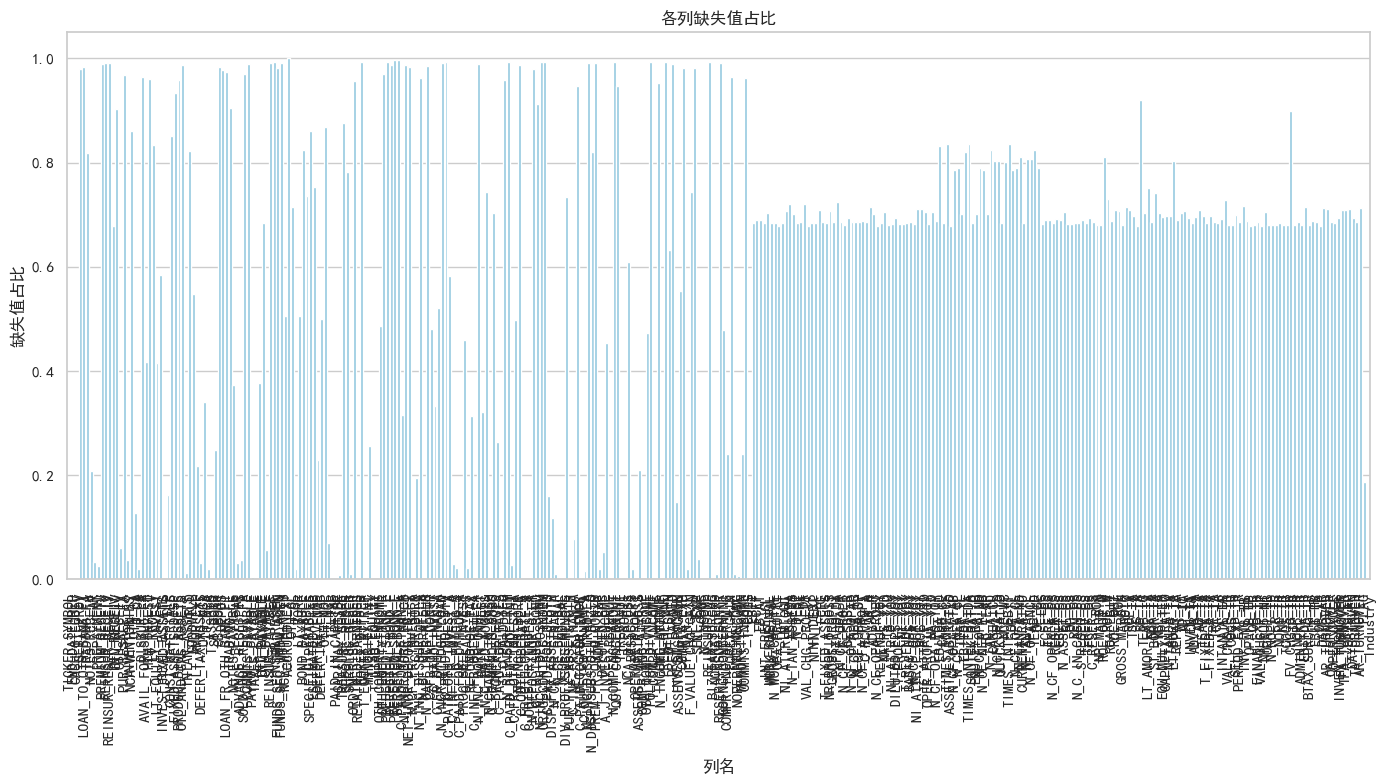

In [12]:
# 对特征因子做缺失值比例图

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置Seaborn的图表样式
sns.set(style="whitegrid")

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号'-'显示为方块的问题

# 计算每列缺失值的数量
missing_values = df.isnull().sum()

# 计算每列缺失值的占比
missing_ratio = missing_values / len(df)

# 转换为DataFrame以便于使用Seaborn
missing_data = pd.DataFrame({'Column': missing_values.index, 'Missing Ratio': missing_ratio.values})

# 绘制柱状图
plt.figure(figsize=(14, 8))  # 设置图像大小
sns.barplot(x='Column', y='Missing Ratio', data=missing_data, color='skyblue')

# 添加标题和轴标签
plt.title('各列缺失值占比')
plt.xlabel('列名')
plt.ylabel('缺失值占比')

# 旋转x轴标签以避免重叠，论文里边直接截掉标签
plt.xticks(rotation=90)

# 自动调整子图参数，使之填充整个图像区域
plt.tight_layout()

plt.savefig('image/各列缺失值占比.png', dpi=800, bbox_inches='tight')
plt.show()

### 计算不同缺失值比例区间的列有多少

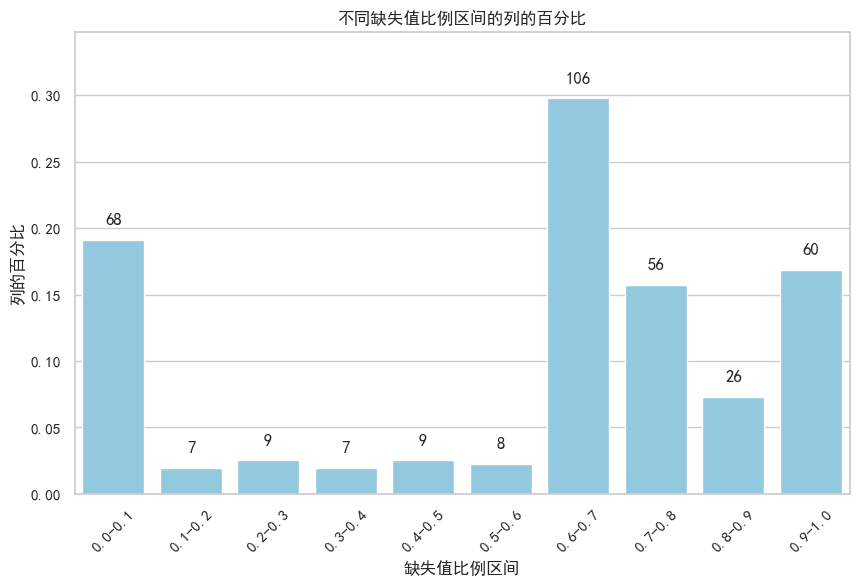

In [13]:
#画出不同缺失值比例区间的列的百分比，控制删除的列数在全部的1/5左右

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 设置Seaborn的图表样式
sns.set(style="whitegrid")

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号'-'显示为方块的问题

# 计算每列的缺失值数量和缺失值占比
missing_counts = df.isnull().sum()
total_counts = len(df)
missing_ratios = missing_counts / total_counts

# 计算各个缺失比率区间的列数占比
bins = np.arange(0, 1.1, 0.1)  # 创建从0到1.0的区间
bin_labels = [f"{bins[i]:.1f}-{bins[i+1]:.1f}" for i in range(len(bins)-1)]
bin_counts = pd.cut(missing_ratios, bins=bins, labels=bin_labels, include_lowest=True).value_counts().sort_index()

# 计算占比
bin_percentages = bin_counts / len(df.columns)

# 使用Seaborn绘制图表显示列数占比
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=bin_percentages.index, y=bin_percentages.values, color='skyblue')
plt.xlabel('缺失值比例区间')
plt.ylabel('列的百分比')
plt.title('不同缺失值比例区间的列的百分比')
plt.xticks(rotation=45)

# 调整y轴的显示范围，使柱体上的数字可以显示在图表内
ax.set_ylim(0, bin_percentages.max() + 0.05)

# 在每个柱状图上显示具体的列数
for i, count in enumerate(bin_counts.values):
    ax.text(i, bin_percentages.values[i] + 0.01, str(count), ha='center', va='bottom')

plt.show()

### 分行业画出缺失值占比 - 19个行业

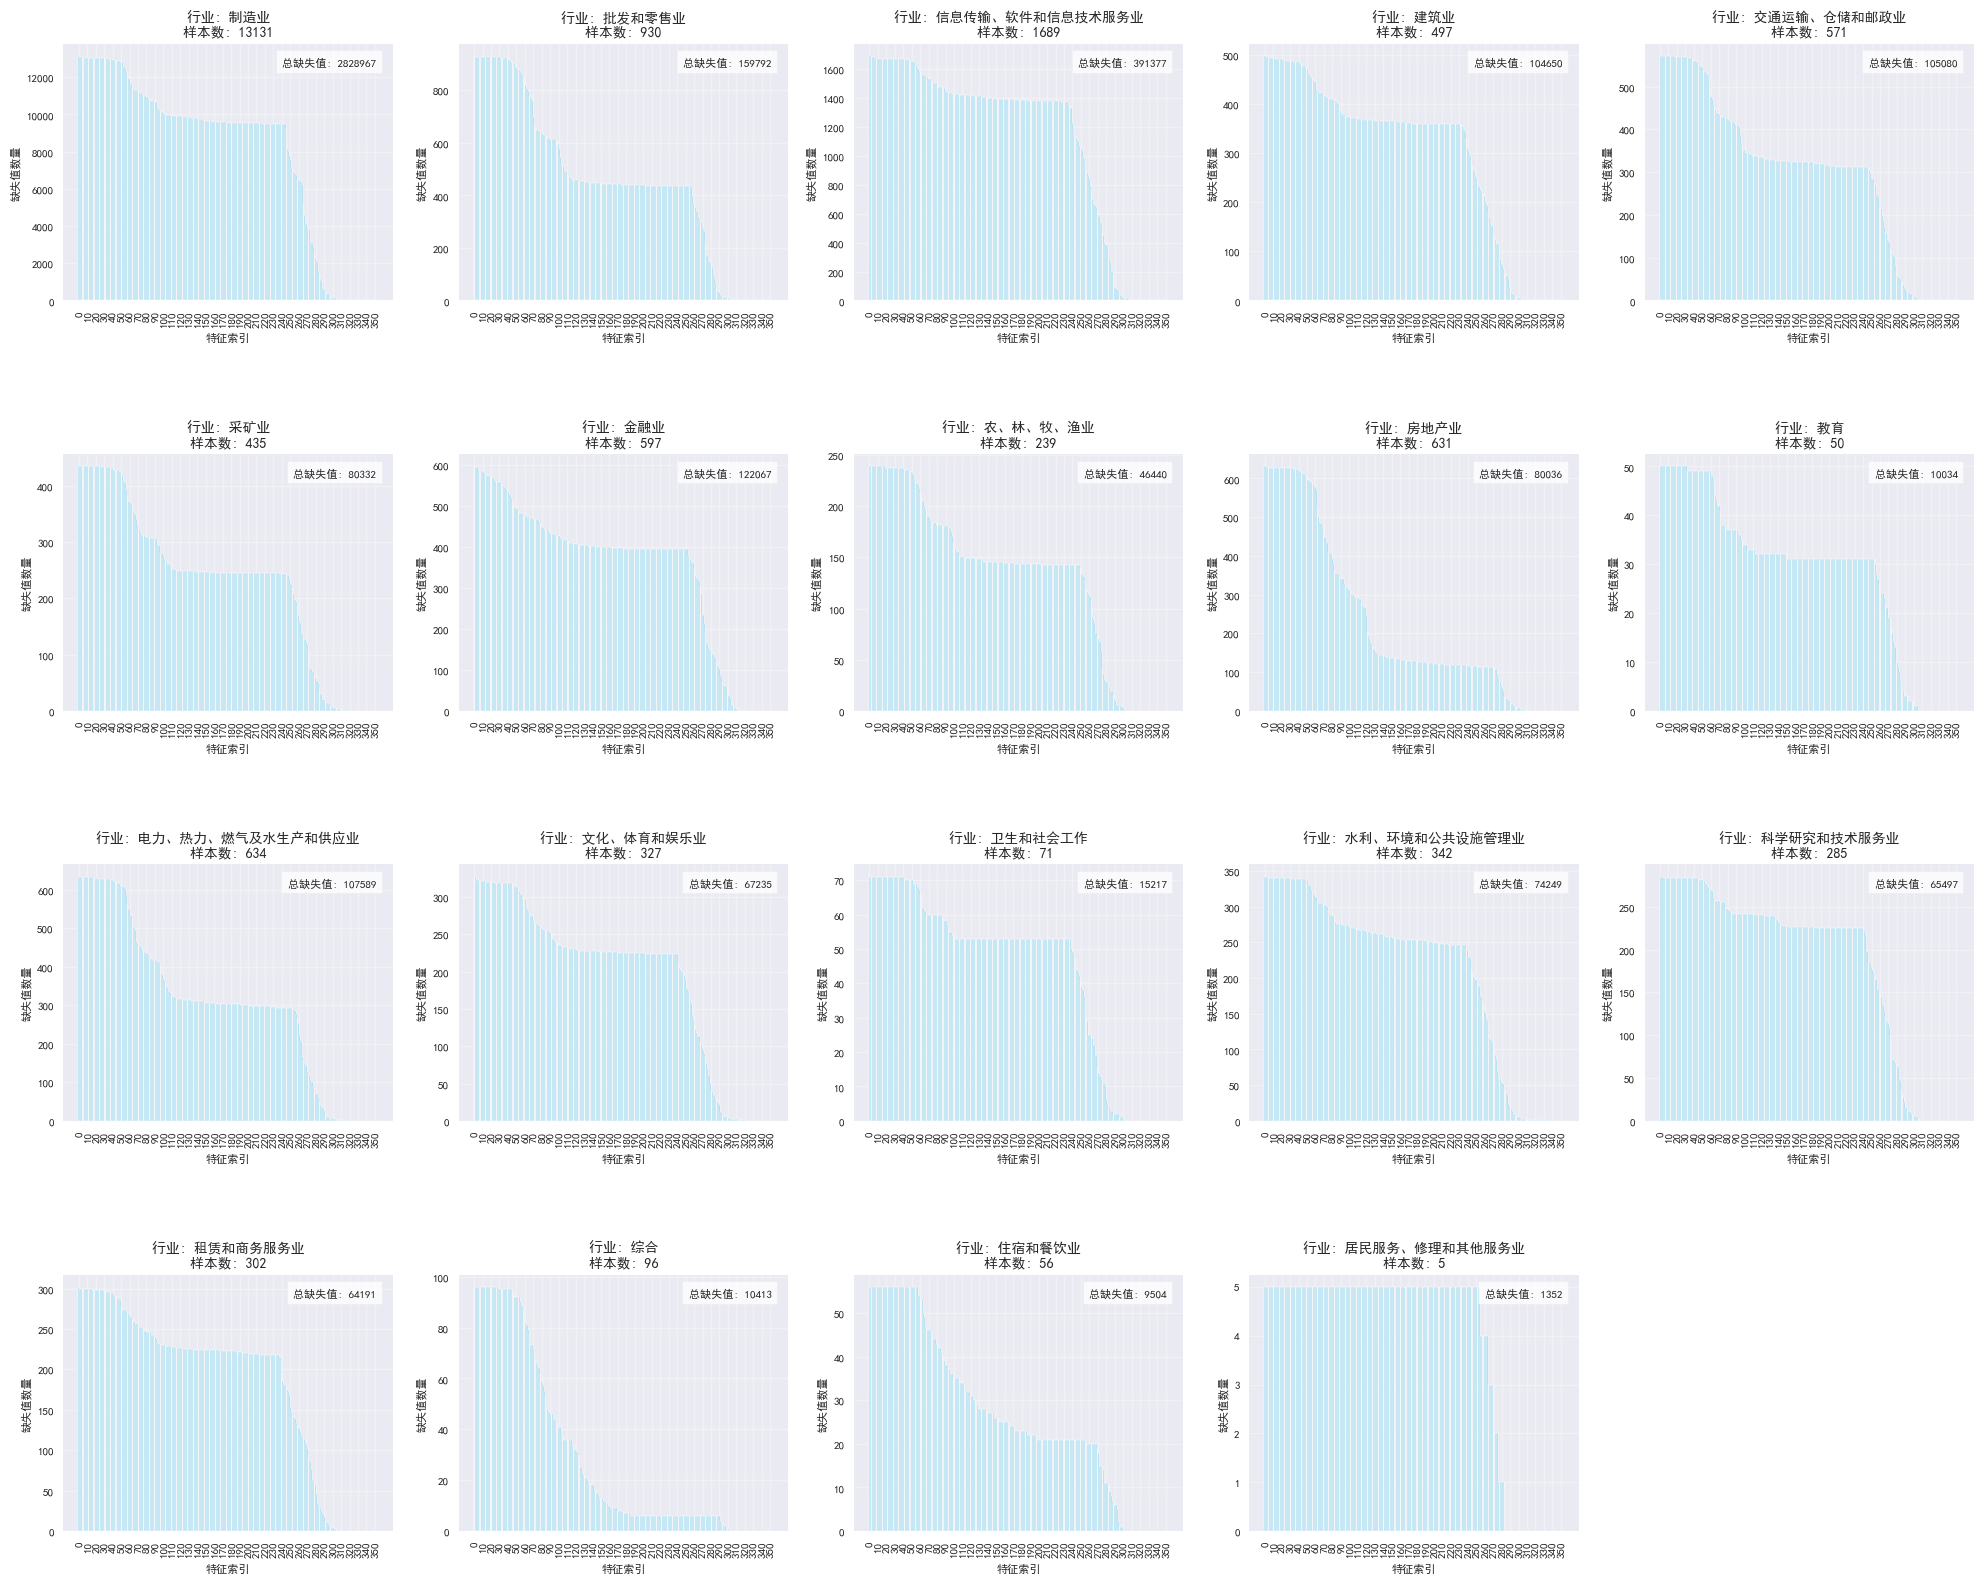

In [14]:
#分行业画出缺失值占比
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

# 读取数据
df = pd.read_csv('output/data.csv')

# 设置图表样式
plt.style.use('seaborn')

# 定义天蓝色
sky_blue = '#87CEEB'

# 计算每个行业的特征缺失值
industries = df['Industry'].unique()
n_industries = len(industries)

# 设置子图网格的行数和列数
n_cols = 5
n_rows = (n_industries + n_cols - 1) // n_cols

# 创建足够大的图形以容纳所有子图
plt.figure(figsize=(20, 4*n_rows))

# 为每个行业创建一个子图
for idx, industry in enumerate(industries, 1):
    # 获取该行业的数据
    industry_data = df[df['Industry'] == industry]
    
    # 计算该行业每个特征的缺失值数量
    missing_counts = industry_data.isnull().sum()
    missing_counts = missing_counts.drop(['FLAG', 'Industry'])
    missing_counts = missing_counts.sort_values(ascending=False)
    
    # 创建子图
    plt.subplot(n_rows, n_cols, idx)
    
    # 绘制天蓝色条形图
    bars = plt.bar(range(len(missing_counts)), missing_counts.values, color=sky_blue)
    
    # 设置标题和标签
    plt.title(f'行业: {industry}\n样本数: {len(industry_data)}', fontsize=10)
    plt.xlabel('特征索引', fontsize=8)
    plt.ylabel('缺失值数量', fontsize=8)
    
    # 设置x轴刻度
    x_ticks = np.arange(0, len(missing_counts), 10)
    plt.xticks(x_ticks, x_ticks, fontsize=8)
    # 设置x轴刻度标签旋转
    plt.xticks(x_ticks, x_ticks, fontsize=8, rotation=90)  # 旋转90度
    
    # 调整y轴刻度字体大小
    plt.yticks(fontsize=8)
    
    # 添加网格线
    plt.grid(True, alpha=0.3)
    
    # 添加缺失值总数的文本标注
    total_missing = missing_counts.sum()
    plt.text(0.95, 0.95, f'总缺失值: {total_missing}',
             transform=plt.gca().transAxes,
             horizontalalignment='right',
             verticalalignment='top',
             fontsize=8,
             bbox=dict(facecolor='white', alpha=0.8))
    # 设置中文字体
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
    plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号'-'显示为方块的问题
    
    # 设置紧凑布局
    plt.tight_layout()

# 调整子图之间的间距
plt.subplots_adjust(hspace=0.6)

# 设置白色背景
plt.gcf().set_facecolor('white')

# 保存图表
plt.savefig('image/各行业缺失值情况.png', dpi=600, bbox_inches='tight', facecolor='white')

### 分行业画出缺失值占比 - 8个行业

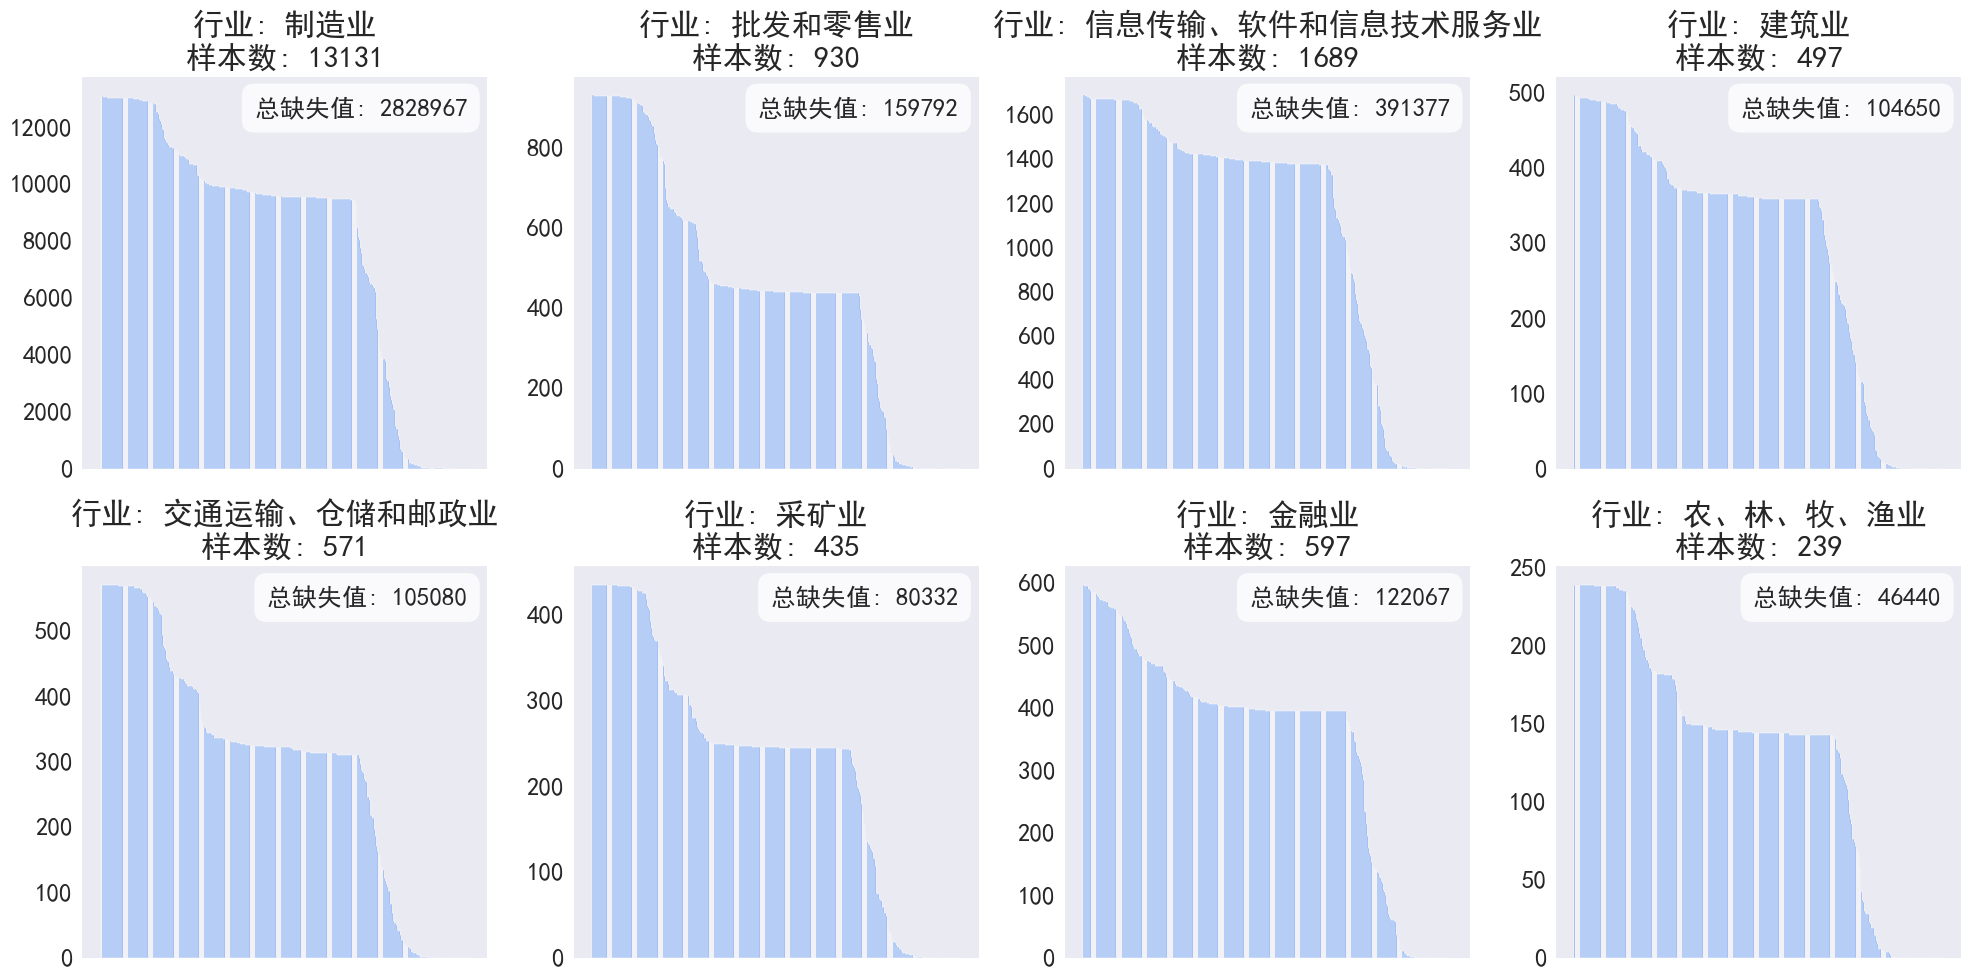

In [14]:
#分行业画出缺失值占比
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager
# 读取数据
df = pd.read_csv('output/data.csv')
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号'-'显示为方块的问题
# 设置字体粗细和大小全局参数
plt.rcParams['font.weight'] = 'bold'  # 全局设置字体粗细
plt.rcParams['axes.titleweight'] = 'bold'  # 设置标题字体粗细
plt.rcParams['axes.labelweight'] = 'bold'  # 设置轴标签字体粗细
# 设置图表样式
plt.style.use('seaborn')
# 定义柔和的蓝色色系
soft_blue = '#6495ED'  # 矢车菊蓝，比天蓝色柔和一些
# 获取行业列表并只取前8个
industries = df['Industry'].unique()[:8]
# 设置子图网格为4列2行
n_cols = 4
n_rows = 2
# 创建足够大的图形
plt.figure(figsize=(20, 10))
# 为每个行业创建一个子图
for idx, industry in enumerate(industries, 1):
    # 获取该行业的数据
    industry_data = df[df['Industry'] == industry]
    
    # 计算该行业每个特征的缺失值数量
    missing_counts = industry_data.isnull().sum()
    missing_counts = missing_counts.drop(['FLAG', 'Industry'])
    missing_counts = missing_counts.sort_values(ascending=False)
    
    # 创建子图
    plt.subplot(n_rows, n_cols, idx)
    
    # 绘制柔和蓝色条形图
    bars = plt.bar(range(len(missing_counts)), missing_counts.values, color=soft_blue)
    
    # 设置标题和标签 - 加粗和放大
    plt.title(f'行业: {industry}\n样本数: {len(industry_data)}', fontsize=22, fontweight='bold')
    
    # 隐藏x轴标识
    plt.xticks([])
    plt.xlabel('')
    
    # 调整y轴刻度字体大小和加粗
    plt.yticks(fontsize=18, fontweight='bold')
    
    # 不添加网格线
    plt.grid(False)
    
    # 添加缺失值总数的文本标注 - 更加粗和放大
    total_missing = missing_counts.sum()
    plt.text(0.95, 0.95, f'总缺失值: {total_missing}',
             transform=plt.gca().transAxes,
             horizontalalignment='right',
             verticalalignment='top',
             fontsize=18, 
             fontweight='bold',
             bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))
    
# 调整子图之间的间距
plt.subplots_adjust(wspace=0.3, hspace=0.4)
# 设置白色背景
plt.gcf().set_facecolor('white')
# 设置整体紧凑布局
plt.tight_layout()
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号'-'显示为方块的问题
# 保存图表，高分辨率
plt.savefig('image/各行业缺失值情况.png', dpi=600, bbox_inches='tight', facecolor='white')
# 显示图表
plt.show()

In [15]:
# # 计算并显示每个特征的缺失值比例
# missing_ratio = df.isnull().sum() / len(df)
# print("\n各特征缺失值比例:")
# print(missing_ratio)

# columns_to_keep = missing_ratio[missing_ratio == 0].index
# df[columns_to_keep]



各特征缺失值比例:
TICKER_SYMBOL          0.000000
END_DATE_REP           0.000000
CASH_C_EQUIV           0.000048
SETT_PROV              0.980324
LOAN_TO_OTH_BANK_FI    0.982526
                         ...   
DAYS_INVEN             0.693843
TA_TURNOVER            0.685417
AR_TURNOVER            0.713328
FLAG                   0.186949
Industry               0.000000
Length: 356, dtype: float64


,TICKER_SYMBOL,END_DATE_REP,T_ASSETS,T_LIAB,T_EQUITY_ATTR_P,T_SH_EQUITY,T_LIAB_EQUITY,Industry
0,4019,2,1.986631e+09,1.990142e+08,1.787616e+09,1.787616e+09,1.986631e+09,制造业
1,4019,3,2.132282e+09,3.474660e+08,1.784816e+09,1.784816e+09,2.132282e+09,制造业
2,4019,4,3.360603e+09,9.086384e+08,2.451965e+09,2.451965e+09,3.360603e+09,制造业
3,4019,5,3.297333e+09,7.969859e+08,2.500347e+09,2.500347e+09,3.297333e+09,制造业
4,4019,6,5.287916e+09,2.576073e+09,2.711843e+09,2.711843e+09,5.287916e+09,制造业
...,...,...,...,...,...,...,...,...
20883,4955770,7,5.656120e+08,1.866238e+08,3.789882e+08,3.789882e+08,5.656120e+08,制造业
20884,4955770,7,5.520427e+08,1.557554e+08,3.962873e+08,3.962873e+08,5.520427e+08,制造业
20885,4958289,7,2.417326e+08,5.457231e+07,1.871603e+08,1.871603e+08,2.417326e+08,制造业
20886,4958289,7,2.995699e+08,6.989538e+07,2.296746e+08,2.296746e+08,2.995699e+08,制造业


### 填充缺失值 - 分行业 - 输出文件 'output/data_imputed.csv'

In [23]:
# 分层次填充缺失值
# 保留原有Industry列，确保和原来的值一一对应
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

# 读取数据
df = pd.read_csv('output/data.csv')
print("原始数据形状:", df.shape)

# 计算并显示每个特征的缺失值比例
missing_ratio = df.isnull().sum() / len(df)
print("\n各特征缺失值比例:")
for col, ratio in missing_ratio.items():
    print(f"{col}: {ratio:.2%}")

# 删除缺失值比例大于60%的列
columns_to_keep = missing_ratio[missing_ratio <= 0.6].index
df = df[columns_to_keep]
print("\n删除高缺失值列后的数据形状:", df.shape)

# 获取所有行业
industries = df['Industry'].unique()
print(f"\n数据集中包含 {len(industries)} 个行业")

# 分离目标变量
target = df['FLAG']
features_df = df.drop(['FLAG'], axis=1)

def process_industry_group(industry_df, industry_name):
    """处理单个行业组的数据"""
    print(f"\n处理行业: {industry_name}")
    print(f"该行业样本数量: {len(industry_df)}")
    
    # 保存Industry列的值，以便后续添加回来
    industry_values = industry_df['Industry'].copy()
    
    # 暂时删除Industry列进行处理
    df_for_imputation = industry_df.drop(['Industry'], axis=1)
    
    # 初始化特征列表
    no_missing_cols = df_for_imputation.columns[df_for_imputation.isnull().sum() == 0].tolist()
    
    # 处理全是空值的列 - 查找并填充为0
    all_missing_cols = df_for_imputation.columns[df_for_imputation.isnull().sum() == len(df_for_imputation)].tolist()
    for col in all_missing_cols:
        print(f"填充全是空值的列 {col} 为0")
        df_for_imputation[col] = 0
    
    # 将全是空值但已填充的列添加到no_missing_cols
    no_missing_cols += all_missing_cols
    
    high_missing_cols = [col for col in df_for_imputation.columns 
                        if 0.3 <= df_for_imputation[col].isnull().sum() / len(df_for_imputation) <= 0.6]
    low_missing_cols = [col for col in df_for_imputation.columns 
                       if col not in no_missing_cols and col not in high_missing_cols 
                       and df_for_imputation[col].isnull().sum() > 0]
    
    print(f"无缺失值特征: {len(no_missing_cols)} 个")
    print(f"高缺失值特征 (0.3-0.6): {len(high_missing_cols)} 个")
    print(f"低缺失值特征 (需要使用随机森林): {len(low_missing_cols)} 个")
    
    # 用0填充高缺失值特征
    for col in high_missing_cols:
        missing_ratio = df_for_imputation[col].isnull().sum() / len(df_for_imputation)
        print(f"用0填充 {col}: {missing_ratio:.2%}")
        df_for_imputation[col].fillna(0, inplace=True)
    
    # 初始化可用于预测的特征集
    available_features = no_missing_cols + high_missing_cols
    
    # 按缺失值比例对低缺失值特征进行排序
    missing_ratios = {col: df_for_imputation[col].isnull().sum() / len(df_for_imputation) 
                     for col in low_missing_cols}
    sorted_features = sorted(missing_ratios.items(), key=lambda x: x[1])
    
    # 处理低缺失值特征
    for idx, (feature, ratio) in enumerate(sorted_features, 1):
        print(f"\n处理特征 {idx}/{len(sorted_features)}: {feature}")
        print(f"缺失值比例: {ratio:.2%}")
        print(f"当前可用特征数量: {len(available_features)}")
        
        # 准备训练数据
        mask = df_for_imputation[feature].notnull()
        
        # 如果样本太少，使用均值填充
        if mask.sum() < 10 or (~mask).sum() < 5:  # 至少需要10个训练样本和5个测试样本
            print(f"样本数量不足，使用均值填充")
            mean_value = df_for_imputation[feature].mean()
            df_for_imputation[feature].fillna(mean_value, inplace=True)
            available_features.append(feature)
            continue
        
        # 使用所有可用特征进行预测
        X_train = df_for_imputation.loc[mask, available_features]
        y_train = df_for_imputation.loc[mask, feature]
        X_test = df_for_imputation.loc[~mask, available_features]
        
        # 确保没有无穷值
        X_train = X_train.replace([np.inf, -np.inf], np.nan)
        X_test = X_test.replace([np.inf, -np.inf], np.nan)
        
        # 临时填充预测特征中的缺失值
        column_means = X_train.mean()
        X_train = X_train.fillna(column_means)
        X_test = X_test.fillna(column_means)
        
        try:
            # 训练随机森林模型
            rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
            rf_model.fit(X_train, y_train)
            
            # 评估特征重要性
            importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
            top_features = importances.nlargest(min(5, len(importances)))
            print("\n最重要的预测特征:")
            for feat, imp in top_features.items():
                print(f"{feat}: {imp:.4f}")
            
            # 预测并填充缺失值
            predictions = rf_model.predict(X_test)
            df_for_imputation.loc[~mask, feature] = predictions
            
            # 将填充完的特征添加到可用特征集
            available_features.append(feature)
            
        except Exception as e:
            print(f"处理特征 {feature} 时出错: {str(e)}")
            print("使用均值填充")
            mean_value = df_for_imputation[feature].mean()
            df_for_imputation[feature].fillna(mean_value, inplace=True)
            available_features.append(feature)
    
    # 处理完成后，将Industry列添加回来
    df_for_imputation['Industry'] = industry_values
    
    return df_for_imputation

# 按行业处理数据
result_dfs = []
for industry in industries:
    # 获取该行业的数据
    industry_data = features_df[features_df['Industry'] == industry].copy()
    
    # 处理该行业的数据
    processed_df = process_industry_group(industry_data, industry)
    
    # 添加到结果列表
    result_dfs.append(processed_df)

# 合并所有处理后的数据
df_imputed = pd.concat(result_dfs, axis=0)

# 按原始索引排序
df_imputed = df_imputed.sort_index()

# 添加回目标变量
df_imputed['FLAG'] = target

# 验证Industry列的一致性
industry_check = all(df_imputed['Industry'] == features_df['Industry'])
print(f"\nIndustry列一致性检查: {'通过' if industry_check else '失败'}")

# 验证最终结果
print("\n数据处理完成")
print("最终数据形状:", df_imputed.shape)
remaining_missing = df_imputed.isnull().sum()
if remaining_missing.sum() > 0:
    print("\n仍有缺失值的列:")
    for col, count in remaining_missing[remaining_missing > 0].items():
        ratio = count / len(df_imputed)
        print(f"{col}: {count}个缺失值 ({ratio:.2%})")
else:
    print("\n所有缺失值已成功填充")

# 保存结果
df_imputed.to_csv('output/data_imputed.csv', index=False)
print("\n处理后的数据已保存到 output/data_imputed.csv")

原始数据形状: (20888, 356)

各特征缺失值比例:
TICKER_SYMBOL: 0.00%
END_DATE_REP: 0.00%
CASH_C_EQUIV: 0.00%
SETT_PROV: 98.03%
LOAN_TO_OTH_BANK_FI: 98.25%
TRADING_FA: 81.75%
NOTES_RECEIV: 20.81%
AR: 3.29%
PREPAYMENT: 2.55%
PREMIUM_RECEIV: 99.00%
REINSUR_RECEIV: 99.04%
REINSUR_RESER_RECEIV: 99.16%
INT_RECEIV: 67.89%
DIV_RECEIV: 90.27%
OTH_RECEIV: 5.99%
PUR_RESALE_FA: 96.87%
INVENTORIES: 3.73%
NCA_WITHIN_1Y: 86.01%
OTH_CA: 12.76%
T_CA: 2.00%
DISBUR_LA: 96.43%
AVAIL_FOR_SALE_FA: 41.69%
HTM_INVEST: 96.10%
LT_RECEIV: 83.31%
LT_EQUITY_INVEST: 41.45%
INVEST_REAL_ESTATE: 58.44%
FIXED_ASSETS: 0.02%
CIP: 16.24%
CONST_MATERIALS: 85.13%
FIXED_ASSETS_DISP: 93.35%
PRODUC_BIOL_ASSETS: 95.79%
OIL_AND_GAS_ASSETS: 98.72%
INTAN_ASSETS: 1.24%
R_D: 82.29%
GOODWILL: 54.72%
LT_AMOR_EXP: 21.69%
DEFER_TAX_ASSETS: 3.17%
OTH_NCA: 33.95%
T_NCA: 2.01%
T_ASSETS: 0.00%
ST_BORR: 24.85%
CB_BORR: 98.38%
DEPOS: 97.71%
LOAN_FR_OTH_BANK_FI: 97.31%
TRADING_FL: 90.44%
NOTES_PAYABLE: 37.34%
AP: 3.04%
ADVANCE_RECEIPTS: 3.77%
SOLD_FOR_REPUR_F


最重要的预测特征:
T_LIAB_EQUITY: 0.2326
T_EQUITY_ATTR_P: 0.1851
T_ASSETS: 0.1678
C_PAID_FOR_TAXES: 0.0440
T_SH_EQUITY: 0.0437

处理特征 11/59: COGS
缺失值比例: 0.04%
当前可用特征数量: 57

最重要的预测特征:
T_COGS: 0.4994
C_INF_FR_OPERATE_A: 0.1151
C_OUTF_OPERATE_A: 0.1004
C_PAID_G_S: 0.0754
REVENUE: 0.0355

处理特征 12/59: COMPR_INC_ATTR_P
缺失值比例: 0.05%
当前可用特征数量: 58

最重要的预测特征:
N_INCOME_ATTR_P: 0.6919
T_COMPR_INCOME: 0.2136
OPERATE_PROFIT: 0.0325
N_INCOME: 0.0303
T_PROFIT: 0.0179

处理特征 13/59: RETAINED_EARNINGS
缺失值比例: 0.05%
当前可用特征数量: 59

最重要的预测特征:
T_PROFIT: 0.3864
T_EQUITY_ATTR_P: 0.1673
N_INCOME_ATTR_P: 0.1220
COMPR_INC_ATTR_P: 0.0809
OPERATE_PROFIT: 0.0482

处理特征 14/59: C_FR_SALE_G_S
缺失值比例: 0.08%
当前可用特征数量: 60

最重要的预测特征:
C_INF_FR_OPERATE_A: 0.4720
C_OUTF_OPERATE_A: 0.1069
A_J_INVEST_INCOME: 0.0772
C_PAID_G_S: 0.0748
LT_EQUITY_INVEST: 0.0412

处理特征 15/59: C_OUTF_FR_INVEST_A
缺失值比例: 0.08%
当前可用特征数量: 61

最重要的预测特征:
C_PAID_INVEST: 0.5063
PROC_SELL_INVEST: 0.2468
N_CF_FR_INVEST_A: 0.0522
COGS: 0.0187
C_PAID_OTH_INVEST_A: 0.0145

处理特


最重要的预测特征:
INVENTORIES: 0.3677
DEFER_TAX_LIAB: 0.1858
N_CF_OPERATE_A: 0.0500
FINAN_EXP: 0.0262
AR: 0.0121

处理行业: 批发和零售业
该行业样本数量: 930
无缺失值特征: 40 个
高缺失值特征 (0.3-0.6): 23 个
低缺失值特征 (需要使用随机森林): 43 个
用0填充 NOTES_RECEIV: 36.34%
用0填充 INVEST_REAL_ESTATE: 33.98%
用0填充 GOODWILL: 47.31%
用0填充 OTH_NCA: 40.00%
用0填充 NOTES_PAYABLE: 31.94%
用0填充 INT_PAYABLE: 32.37%
用0填充 NCL_WITHIN_1Y: 51.83%
用0填充 LT_BORR: 48.60%
用0填充 DEFER_REVENUE: 30.11%
用0填充 DEFER_TAX_LIAB: 38.17%
用0填充 OTH_COMPRE_INCOME: 40.11%
用0填充 C_PAID_OTH_FINAN_A: 33.23%
用0填充 C_FR_CAP_CONTR: 47.53%
用0填充 C_FR_OTH_FINAN_A: 48.17%
用0填充 C_PAID_OTH_INVEST_A: 55.48%
用0填充 PROC_SELL_INVEST: 36.67%
用0填充 REFUND_OF_TAX: 49.89%
用0填充 FOREX_EFFECTS: 42.80%
用0填充 C_FR_OTH_INVEST_A: 50.75%
用0填充 A_J_INVEST_INCOME: 33.12%
用0填充 OTH_COMPR_INCOME: 39.25%
用0填充 ASSETS_DISP_GAIN: 55.05%
用0填充 GOING_CONCERN_NI: 50.32%

处理特征 1/43: RETAINED_EARNINGS
缺失值比例: 0.11%
当前可用特征数量: 63
样本数量不足，使用均值填充

处理特征 2/43: C_PAID_G_S
缺失值比例: 0.11%
当前可用特征数量: 64
样本数量不足，使用均值填充

处理特征 3/43: C_FR_SALE_G_S
缺失


最重要的预测特征:
C_PAID_G_S: 0.2637
COGS: 0.1848
T_COGS: 0.1423
C_OUTF_OPERATE_A: 0.1245
C_FR_SALE_G_S: 0.0644

处理特征 11/49: PAYROLL_PAYABLE
缺失值比例: 0.41%
当前可用特征数量: 67

最重要的预测特征:
N_CF_FR_INVEST_A: 0.1365
OTH_COMPRE_INCOME: 0.1099
BIZ_TAX_SURCHG: 0.0917
C_PAID_TO_FOR_EMPL: 0.0685
INT_PAYABLE: 0.0621

处理特征 12/49: SELL_EXP
缺失值比例: 0.41%
当前可用特征数量: 68

最重要的预测特征:
N_CF_FR_INVEST_A: 0.1758
OTH_COMPRE_INCOME: 0.0990
CIP: 0.0968
BIZ_TAX_SURCHG: 0.0690
C_FR_BORR: 0.0686

处理特征 13/49: AR
缺失值比例: 0.53%
当前可用特征数量: 69

最重要的预测特征:
RETAINED_EARNINGS: 0.1954
T_CA: 0.1213
TAXES_PAYABLE: 0.1150
N_CE_BEG_BAL: 0.0932
C_PAID_FOR_TAXES: 0.0884

处理特征 14/49: INCOME_TAX
缺失值比例: 0.71%
当前可用特征数量: 70

最重要的预测特征:
T_REVENUE: 0.0839
N_CF_OPERATE_A: 0.0808
C_PAID_G_S: 0.0775
T_CL: 0.0747
REVENUE: 0.0651

处理特征 15/49: AP
缺失值比例: 0.83%
当前可用特征数量: 71

最重要的预测特征:
N_CF_OPERATE_A: 0.1441
TAXES_PAYABLE: 0.1093
FIXED_ASSETS: 0.1067
OTH_COMPRE_INCOME: 0.1061
PAYROLL_PAYABLE: 0.0872

处理特征 16/49: INTAN_ASSETS
缺失值比例: 1.12%
当前可用特征数量: 72

最重要的预测特征:
OTH


最重要的预测特征:
N_CF_FR_INVEST_A: 0.5032
FIXED_ASSETS: 0.2062
REFUND_OF_TAX: 0.0628
LT_BORR: 0.0532
C_OUTF_FR_INVEST_A: 0.0438

处理特征 13/43: INVENTORIES
缺失值比例: 1.21%
当前可用特征数量: 75

最重要的预测特征:
AR: 0.1249
C_PAID_G_S: 0.0945
C_PAID_FOR_TAXES: 0.0763
C_OUTF_OPERATE_A: 0.0722
C_INF_FR_OPERATE_A: 0.0691

处理特征 14/43: NOPERATE_EXP
缺失值比例: 1.21%
当前可用特征数量: 76

最重要的预测特征:
AR: 0.1702
ADMIN_EXP: 0.1126
INVENTORIES: 0.0834
CAPITAL_RESER: 0.0676
INVEST_REAL_ESTATE: 0.0448

处理特征 15/43: PREPAYMENT
缺失值比例: 1.41%
当前可用特征数量: 77

最重要的预测特征:
NOPERATE_INCOME: 0.2671
C_OUTF_FR_FINAN_A: 0.1092
BIZ_TAX_SURCHG: 0.0689
N_CE_END_BAL: 0.0674
LT_EQUITY_INVEST: 0.0584

处理特征 16/43: INTAN_ASSETS
缺失值比例: 1.41%
当前可用特征数量: 78

最重要的预测特征:
FIXED_ASSETS: 0.3088
PUR_FIX_ASSETS_OTH: 0.2248
N_CF_FR_INVEST_A: 0.1152
FINAN_EXP: 0.0618
C_OUTF_FR_INVEST_A: 0.0498

处理特征 17/43: DEFER_TAX_ASSETS
缺失值比例: 2.01%
当前可用特征数量: 79

最重要的预测特征:
INVEST_REAL_ESTATE: 0.2138
PAID_IN_CAPITAL: 0.1956
AR: 0.1852
AP: 0.0576
C_PAID_G_S: 0.0275

处理特征 18/43: C_PAID_DIV_PROF


最重要的预测特征:
C_PAID_FOR_TAXES: 0.2917
T_CL: 0.0693
T_CA: 0.0513
OTH_COMPRE_INCOME: 0.0293
N_CF_FR_INVEST_A: 0.0288

处理特征 21/49: PREPAYMENT
缺失值比例: 3.50%
当前可用特征数量: 77

最重要的预测特征:
C_OUTF_OPERATE_A: 0.2914
C_PAID_G_S: 0.1733
C_INF_FR_OPERATE_A: 0.0513
ADMIN_EXP: 0.0380
C_FR_OTH_OPERATE_A: 0.0340

处理特征 22/49: INVENTORIES
缺失值比例: 3.85%
当前可用特征数量: 78

最重要的预测特征:
BIZ_TAX_SURCHG: 0.1237
PAID_IN_CAPITAL: 0.1111
T_CA: 0.0726
T_COMPR_INCOME: 0.0566
INCOME_TAX: 0.0565

处理特征 23/49: INTAN_ASSETS
缺失值比例: 4.03%
当前可用特征数量: 79

最重要的预测特征:
SURPLUS_RESER: 0.1404
C_PAID_DIV_PROF_INT: 0.1094
INVENTORIES: 0.0898
FIXED_ASSETS: 0.0807
ADMIN_EXP: 0.0744

处理特征 24/49: ADVANCE_RECEIPTS
缺失值比例: 4.73%
当前可用特征数量: 80

最重要的预测特征:
OTH_NCA: 0.0883
INVEST_REAL_ESTATE: 0.0838
AVAIL_FOR_SALE_FA: 0.0824
DEFER_TAX_LIAB: 0.0810
INVENTORIES: 0.0792

处理特征 25/49: DILUTED_EPS
缺失值比例: 4.90%
当前可用特征数量: 81

最重要的预测特征:
BASIC_EPS: 0.8625
NOPERATE_EXP: 0.0447
T_EQUITY_ATTR_P: 0.0233
T_SH_EQUITY: 0.0087
N_INCOME_ATTR_P: 0.0056

处理特征 26/49: DISP_FIX_ASSE


最重要的预测特征:
N_CF_FR_INVEST_A: 0.2387
GOODWILL: 0.1831
GAIN_INVEST: 0.0792
NOPERATE_EXP: 0.0525
T_LIAB: 0.0369

处理特征 24/50: T_NCL
缺失值比例: 2.99%
当前可用特征数量: 79

最重要的预测特征:
N_CF_FR_INVEST_A: 0.2921
GOODWILL: 0.0991
LT_BORR: 0.0863
OTH_COMPRE_INCOME: 0.0641
RETAINED_EARNINGS: 0.0454

处理特征 25/50: SELL_EXP
缺失值比例: 3.45%
当前可用特征数量: 80

最重要的预测特征:
GOODWILL: 0.1822
N_CF_FR_INVEST_A: 0.1810
LT_EQUITY_INVEST: 0.0598
T_NCA: 0.0486
INTAN_ASSETS: 0.0393

处理特征 26/50: AR
缺失值比例: 3.91%
当前可用特征数量: 81

最重要的预测特征:
GOODWILL: 0.1255
AP: 0.1174
N_CF_FR_INVEST_A: 0.1146
LT_EQUITY_INVEST: 0.0748
SELL_EXP: 0.0677

处理特征 27/50: CIP
缺失值比例: 4.37%
当前可用特征数量: 82

最重要的预测特征:
N_CF_FR_INVEST_A: 0.2383
GOODWILL: 0.2365
AR: 0.0521
ADMIN_EXP: 0.0360
COGS: 0.0354

处理特征 28/50: SURPLUS_RESER
缺失值比例: 4.37%
当前可用特征数量: 83

最重要的预测特征:
GOODWILL: 0.2589
N_CF_FR_INVEST_A: 0.2292
N_CF_OPERATE_A: 0.0697
CIP: 0.0299
T_CA: 0.0299

处理特征 29/50: C_INF_FR_FINAN_A
缺失值比例: 4.83%
当前可用特征数量: 84

最重要的预测特征:
N_CF_FR_INVEST_A: 0.0735
GOODWILL: 0.0676
OTH_RECEIV: 0.0


最重要的预测特征:
C_OUTF_OPERATE_A: 0.2238
DEFER_TAX_ASSETS: 0.1720
PAID_IN_CAPITAL: 0.0987
CASH_C_EQUIV: 0.0619
T_LIAB: 0.0612

处理特征 24/61: C_PAID_INVEST
缺失值比例: 11.06%
当前可用特征数量: 68

最重要的预测特征:
C_OUTF_FR_INVEST_A: 0.9177
C_INF_FR_INVEST_A: 0.0604
N_CF_OPERATE_A: 0.0030
ASSETS_DISP_GAIN: 0.0019
C_OUTF_FR_FINAN_A: 0.0011

处理特征 25/61: MINORITY_INT
缺失值比例: 11.73%
当前可用特征数量: 69

最重要的预测特征:
COMPR_INC_ATTR_M_S: 0.4928
MINORITY_GAIN: 0.3743
C_INF_FR_FINAN_A: 0.0244
C_PAID_FOR_OTH_OP_A: 0.0124
GAIN_INVEST: 0.0114

处理特征 26/61: OTH_COMPRE_INCOME
缺失值比例: 13.90%
当前可用特征数量: 70

最重要的预测特征:
OTH_COMPR_INCOME: 0.4508
GAIN_INVEST: 0.0675
INTAN_ASSETS: 0.0638
FOREX_EFFECTS: 0.0624
INVEST_INCOME: 0.0483

处理特征 27/61: C_PAID_FOR_DEBTS
缺失值比例: 18.26%
当前可用特征数量: 71

最重要的预测特征:
C_OUTF_FR_FINAN_A: 0.8205
C_INF_FR_FINAN_A: 0.0748
GOING_CONCERN_NI: 0.0276
COMPR_INC_ATTR_M_S: 0.0102
N_CF_FR_INVEST_A: 0.0059

处理特征 28/61: INT_PAYABLE
缺失值比例: 21.44%
当前可用特征数量: 72

最重要的预测特征:
CASH_C_EQUIV: 0.1268
T_LIAB: 0.0907
T_LIAB_EQUITY: 0.0747
T_ASS


最重要的预测特征:
GOING_CONCERN_NI: 0.2047
T_CL: 0.0903
PAYROLL_PAYABLE: 0.0598
SELL_EXP: 0.0504
N_CF_FR_INVEST_A: 0.0497

处理特征 12/37: DILUTED_EPS
缺失值比例: 2.51%
当前可用特征数量: 80

最重要的预测特征:
BASIC_EPS: 0.7092
OPERATE_PROFIT: 0.0540
T_COMPR_INCOME: 0.0462
N_INCOME_ATTR_P: 0.0341
T_PROFIT: 0.0268

处理特征 13/37: BIZ_TAX_SURCHG
缺失值比例: 3.77%
当前可用特征数量: 81

最重要的预测特征:
AVAIL_FOR_SALE_FA: 0.2319
C_PAID_FOR_TAXES: 0.1897
LT_EQUITY_INVEST: 0.0715
NOPERATE_INCOME: 0.0529
SURPLUS_RESER: 0.0369

处理特征 14/37: AR
缺失值比例: 4.60%
当前可用特征数量: 82

最重要的预测特征:
T_CA: 0.1085
FINAN_EXP: 0.0769
NOTES_RECEIV: 0.0637
INTAN_ASSETS: 0.0517
T_REVENUE: 0.0492

处理特征 15/37: C_INF_FR_FINAN_A
缺失值比例: 5.86%
当前可用特征数量: 83

最重要的预测特征:
C_OUTF_FR_FINAN_A: 0.3934
FINAN_EXP: 0.2978
T_LIAB: 0.0576
N_CF_FR_FINAN_A: 0.0444
N_CHANGE_IN_CASH: 0.0226

处理特征 16/37: OTH_CA
缺失值比例: 6.28%
当前可用特征数量: 84

最重要的预测特征:
C_OUTF_FR_INVEST_A: 0.2105
PROC_SELL_INVEST: 0.0795
INVENTORIES: 0.0694
C_PAID_FOR_TAXES: 0.0680
SELL_EXP: 0.0443

处理特征 17/37: DEFER_REVENUE
缺失值比例: 7.95%
当


最重要的预测特征:
T_LIAB: 0.1994
C_PAID_DIV_PROF_INT: 0.1601
T_LIAB_EQUITY: 0.1279
T_ASSETS: 0.1235
INVENTORIES: 0.1097

处理特征 27/52: MINORITY_GAIN
缺失值比例: 4.91%
当前可用特征数量: 80

最重要的预测特征:
N_CE_END_BAL: 0.1442
INCOME_TAX: 0.1274
RETAINED_EARNINGS: 0.0882
OPERATE_PROFIT: 0.0796
OTH_RECEIV: 0.0658

处理特征 28/52: C_PAID_FOR_DEBTS
缺失值比例: 5.23%
当前可用特征数量: 81

最重要的预测特征:
C_OUTF_FR_FINAN_A: 0.8524
C_PAID_DIV_PROF_INT: 0.0271
AR: 0.0140
GOODWILL: 0.0140
T_NCL: 0.0093

处理特征 29/52: C_INF_FR_FINAN_A
缺失值比例: 5.23%
当前可用特征数量: 82

最重要的预测特征:
C_OUTF_FR_FINAN_A: 0.7129
C_PAID_FOR_DEBTS: 0.0759
C_PAID_DIV_PROF_INT: 0.0364
N_CF_FR_FINAN_A: 0.0253
T_NCL: 0.0194

处理特征 30/52: COMPR_INC_ATTR_M_S
缺失值比例: 5.39%
当前可用特征数量: 83

最重要的预测特征:
MINORITY_GAIN: 0.7011
T_COMPR_INCOME: 0.0342
BIZ_TAX_SURCHG: 0.0287
T_PROFIT: 0.0218
N_INCOME_ATTR_P: 0.0203

处理特征 31/52: MINORITY_INT
缺失值比例: 5.71%
当前可用特征数量: 84

最重要的预测特征:
T_SH_EQUITY: 0.2037
N_CE_BEG_BAL: 0.1946
COMPR_INC_ATTR_M_S: 0.0705
MINORITY_GAIN: 0.0558
T_CA: 0.0549

处理特征 32/52: INTAN_ASSET


最重要的预测特征:
C_INF_FR_FINAN_A: 0.0861
C_OUTF_FR_FINAN_A: 0.0803
C_FR_BORR: 0.0680
C_PAID_FOR_DEBTS: 0.0556
C_OUTF_OPERATE_A: 0.0551

处理特征 31/37: NCL_WITHIN_1Y
缺失值比例: 62.00%
当前可用特征数量: 99

最重要的预测特征:
C_INF_FR_INVEST_A: 0.0863
TAXES_PAYABLE: 0.0551
OTH_RECEIV: 0.0494
INT_PAYABLE: 0.0474
C_FR_OTH_OPERATE_A: 0.0464

处理特征 32/37: LT_BORR
缺失值比例: 62.00%
当前可用特征数量: 100

最重要的预测特征:
MINORITY_INT: 0.0794
RETAINED_EARNINGS: 0.0583
T_PROFIT: 0.0485
GOING_CONCERN_NI: 0.0396
NOPERATE_INCOME: 0.0392

处理特征 33/37: C_FR_OTH_FINAN_A
缺失值比例: 64.00%
当前可用特征数量: 101

最重要的预测特征:
PUR_FIX_ASSETS_OTH: 0.0630
ASSETS_IMPAIR_LOSS: 0.0595
FOREX_EFFECTS: 0.0583
PREPAYMENT: 0.0562
C_FR_OTH_OPERATE_A: 0.0477

处理特征 34/37: C_PAID_OTH_INVEST_A
缺失值比例: 64.00%
当前可用特征数量: 102

最重要的预测特征:
T_EQUITY_ATTR_P: 0.0943
C_FR_OTH_INVEST_A: 0.0871
INT_PAYABLE: 0.0793
AP: 0.0771
SURPLUS_RESER: 0.0577

处理特征 35/37: LT_EQUITY_INVEST
缺失值比例: 66.00%
当前可用特征数量: 103

最重要的预测特征:
CIP: 0.1101
C_OUTF_FR_INVEST_A: 0.1077
OTH_COMPR_INCOME: 0.1022
C_FR_OTH_FINAN_A: 0


最重要的预测特征:
SURPLUS_RESER: 0.1820
DEFER_TAX_LIAB: 0.1664
OTH_COMPRE_INCOME: 0.1539
CAPITAL_RESER: 0.0791
C_PAID_INVEST: 0.0278

处理特征 45/50: INT_PAYABLE
缺失值比例: 23.03%
当前可用特征数量: 100

最重要的预测特征:
T_NCA: 0.4071
C_PAID_DIV_PROF_INT: 0.1981
T_LIAB: 0.0932
FINAN_EXP: 0.0626
T_NCL: 0.0301

处理特征 46/50: GAIN_INVEST
缺失值比例: 23.50%
当前可用特征数量: 101

最重要的预测特征:
INVEST_INCOME: 0.5030
LT_EQUITY_INVEST: 0.2580
REFUND_OF_TAX: 0.0336
SURPLUS_RESER: 0.0122
C_INF_FR_INVEST_A: 0.0101

处理特征 47/50: C_PAID_OTH_FINAN_A
缺失值比例: 24.45%
当前可用特征数量: 102

最重要的预测特征:
SURPLUS_RESER: 0.1696
C_FR_OTH_FINAN_A: 0.1547
C_PAID_INVEST: 0.1039
C_FR_CAP_CONTR: 0.0630
NCL_WITHIN_1Y: 0.0413

处理特征 48/50: A_J_INVEST_INCOME
缺失值比例: 24.76%
当前可用特征数量: 103

最重要的预测特征:
INVEST_INCOME: 0.5841
GAIN_INVEST: 0.1842
LT_EQUITY_INVEST: 0.1331
PAYROLL_PAYABLE: 0.0039
DEFER_TAX_LIAB: 0.0038

处理特征 49/50: OTH_NCA
缺失值比例: 26.18%
当前可用特征数量: 104

最重要的预测特征:
INVENTORIES: 0.4372
T_NCL: 0.1299
PUR_FIX_ASSETS_OTH: 0.0781
T_NCA: 0.0375
CIP: 0.0374

处理特征 50/50: ASSETS_DISP


最重要的预测特征:
T_NCL: 0.7336
T_NCA: 0.0336
NCL_WITHIN_1Y: 0.0247
C_FR_BORR: 0.0232
FINAN_EXP: 0.0212

处理行业: 卫生和社会工作
该行业样本数量: 71
无缺失值特征: 54 个
高缺失值特征 (0.3-0.6): 15 个
低缺失值特征 (需要使用随机森林): 37 个
用0填充 NOTES_RECEIV: 57.75%
用0填充 LT_EQUITY_INVEST: 35.21%
用0填充 OTH_NCA: 35.21%
用0填充 DEFER_REVENUE: 35.21%
用0填充 DEFER_TAX_LIAB: 40.85%
用0填充 OTH_COMPRE_INCOME: 35.21%
用0填充 C_PAID_OTH_FINAN_A: 30.99%
用0填充 C_FR_OTH_FINAN_A: 59.15%
用0填充 PROC_SELL_INVEST: 40.85%
用0填充 REFUND_OF_TAX: 53.52%
用0填充 FOREX_EFFECTS: 30.99%
用0填充 A_J_INVEST_INCOME: 33.80%
用0填充 OTH_COMPR_INCOME: 33.80%
用0填充 ASSETS_DISP_GAIN: 53.52%
用0填充 GOING_CONCERN_NI: 49.30%

处理特征 1/37: SURPLUS_RESER
缺失值比例: 1.41%
当前可用特征数量: 69
样本数量不足，使用均值填充

处理特征 2/37: C_INF_FR_INVEST_A
缺失值比例: 1.41%
当前可用特征数量: 70
样本数量不足，使用均值填充

处理特征 3/37: C_INF_FR_FINAN_A
缺失值比例: 1.41%
当前可用特征数量: 71
样本数量不足，使用均值填充

处理特征 4/37: DILUTED_EPS
缺失值比例: 1.41%
当前可用特征数量: 72
样本数量不足，使用均值填充

处理特征 5/37: BASIC_EPS
缺失值比例: 1.41%
当前可用特征数量: 73
样本数量不足，使用均值填充

处理特征 6/37: AR
缺失值比例: 2.82%
当前可用特征数量: 74
样本数量不足，使用均值填充



最重要的预测特征:
RETAINED_EARNINGS: 0.6534
AR: 0.0544
INCOME_TAX: 0.0355
C_PAID_FOR_TAXES: 0.0214
T_SH_EQUITY: 0.0160

处理特征 37/67: C_PAID_DIV_PROF_INT
缺失值比例: 1.46%
当前可用特征数量: 75

最重要的预测特征:
FINAN_EXP: 0.1434
T_LIAB_EQUITY: 0.1008
T_ASSETS: 0.0995
T_LIAB: 0.0744
C_OUTF_OPERATE_A: 0.0720

处理特征 38/67: N_CF_FR_FINAN_A
缺失值比例: 1.46%
当前可用特征数量: 76

最重要的预测特征:
N_CE_END_BAL: 0.4283
N_CF_FR_INVEST_A: 0.1161
CASH_C_EQUIV: 0.1065
PUR_FIX_ASSETS_OTH: 0.0507
N_CHANGE_IN_CASH: 0.0397

处理特征 39/67: C_OUTF_FR_FINAN_A
缺失值比例: 1.46%
当前可用特征数量: 77

最重要的预测特征:
FINAN_EXP: 0.2918
C_PAID_DIV_PROF_INT: 0.1498
SURPLUS_RESER: 0.0636
T_LIAB: 0.0614
T_ASSETS: 0.0592

处理特征 40/67: INTAN_ASSETS
缺失值比例: 2.05%
当前可用特征数量: 78

最重要的预测特征:
PUR_FIX_ASSETS_OTH: 0.1273
N_CF_FR_INVEST_A: 0.1065
T_NCA: 0.0964
N_CE_BEG_BAL: 0.0911
LT_EQUITY_INVEST: 0.0808

处理特征 41/67: BASIC_EPS
缺失值比例: 2.34%
当前可用特征数量: 79

最重要的预测特征:
PAID_IN_CAPITAL: 0.3405
N_INCOME: 0.1067
N_INCOME_ATTR_P: 0.0909
COMPR_INC_ATTR_P: 0.0575
OPERATE_PROFIT: 0.0531

处理特征 42/67: DEFER_T


最重要的预测特征:
PAID_IN_CAPITAL: 0.2169
OPERATE_PROFIT: 0.1559
N_INCOME_ATTR_P: 0.0954
N_INCOME: 0.0543
COMPR_INC_ATTR_P: 0.0510

处理特征 17/41: C_INF_FR_INVEST_A
缺失值比例: 4.56%
当前可用特征数量: 81

最重要的预测特征:
C_OUTF_FR_INVEST_A: 0.7537
C_FR_OTH_INVEST_A: 0.1055
PROC_SELL_INVEST: 0.0239
C_PAID_INVEST: 0.0147
ADVANCE_RECEIPTS: 0.0142

处理特征 18/41: OTH_RECEIV
缺失值比例: 5.26%
当前可用特征数量: 82

最重要的预测特征:
GAIN_INVEST: 0.3471
FOREX_EFFECTS: 0.0649
PAYROLL_PAYABLE: 0.0564
AP: 0.0400
TAXES_PAYABLE: 0.0368

处理特征 19/41: C_PAID_DIV_PROF_INT
缺失值比例: 5.26%
当前可用特征数量: 83

最重要的预测特征:
OTH_PAYABLE: 0.1093
C_OUTF_FR_FINAN_A: 0.0786
FOREX_EFFECTS: 0.0756
TAXES_PAYABLE: 0.0747
NOPERATE_EXP: 0.0551

处理特征 20/41: DILUTED_EPS
缺失值比例: 7.72%
当前可用特征数量: 84

最重要的预测特征:
BASIC_EPS: 0.8920
N_INCOME: 0.0180
COMPR_INC_ATTR_P: 0.0145
OPERATE_PROFIT: 0.0115
T_PROFIT: 0.0092

处理特征 21/41: DISP_FIX_ASSETS_OTH
缺失值比例: 9.82%
当前可用特征数量: 85

最重要的预测特征:
ASSETS_DISP_GAIN: 0.4456
FINAN_EXP: 0.1785
NOPERATE_INCOME: 0.0553
FOREX_EFFECTS: 0.0347
C_PAID_FOR_TAXES: 0.0


最重要的预测特征:
GOODWILL: 0.1501
C_FR_OTH_INVEST_A: 0.0844
C_INF_FR_INVEST_A: 0.0809
C_PAID_OTH_INVEST_A: 0.0719
FIXED_ASSETS: 0.0614

处理特征 27/40: DISP_FIX_ASSETS_OTH
缺失值比例: 9.93%
当前可用特征数量: 92

最重要的预测特征:
INT_PAYABLE: 0.0755
C_PAID_OTH_INVEST_A: 0.0691
GOODWILL: 0.0613
NCL_WITHIN_1Y: 0.0481
N_CHANGE_IN_CASH: 0.0408

处理特征 28/40: COMPR_INC_ATTR_M_S
缺失值比例: 9.93%
当前可用特征数量: 93

最重要的预测特征:
N_CE_END_BAL: 0.1289
INCOME_TAX: 0.1259
T_SH_EQUITY: 0.1226
SELL_EXP: 0.0471
PAYROLL_PAYABLE: 0.0405

处理特征 29/40: MINORITY_GAIN
缺失值比例: 10.26%
当前可用特征数量: 94

最重要的预测特征:
COMPR_INC_ATTR_M_S: 0.7950
DILUTED_EPS: 0.0303
INCOME_TAX: 0.0152
SELL_EXP: 0.0128
CASH_C_EQUIV: 0.0121

处理特征 30/40: MINORITY_INT
缺失值比例: 11.59%
当前可用特征数量: 95

最重要的预测特征:
FINAN_EXP: 0.1549
T_LIAB_EQUITY: 0.1266
T_ASSETS: 0.0749
N_CF_FR_FINAN_A: 0.0702
FIXED_ASSETS: 0.0594

处理特征 31/40: LT_AMOR_EXP
缺失值比例: 15.23%
当前可用特征数量: 96

最重要的预测特征:
PAID_IN_CAPITAL: 0.3637
FIXED_ASSETS: 0.0712
MINORITY_INT: 0.0511
N_INCOME: 0.0496
OTH_NCA: 0.0254

处理特征 32/40: C_PAID_FO


最重要的预测特征:
C_PAID_OTH_INVEST_A: 0.3271
CAPITAL_RESER: 0.1035
OTH_CA: 0.0879
FOREX_EFFECTS: 0.0452
ASSETS_DISP_GAIN: 0.0390

处理行业: 住宿和餐饮业
该行业样本数量: 56
无缺失值特征: 54 个
高缺失值特征 (0.3-0.6): 17 个
低缺失值特征 (需要使用随机森林): 35 个
用0填充 LT_EQUITY_INVEST: 32.14%
用0填充 INVEST_REAL_ESTATE: 41.07%
用0填充 GOODWILL: 50.00%
用0填充 OTH_NCA: 33.93%
用0填充 ST_BORR: 39.29%
用0填充 INT_PAYABLE: 35.71%
用0填充 NCL_WITHIN_1Y: 46.43%
用0填充 LT_BORR: 39.29%
用0填充 DEFER_REVENUE: 39.29%
用0填充 C_PAID_OTH_FINAN_A: 35.71%
用0填充 C_FR_BORR: 33.93%
用0填充 C_FR_CAP_CONTR: 55.36%
用0填充 C_FR_OTH_FINAN_A: 46.43%
用0填充 C_FR_OTH_INVEST_A: 42.86%
用0填充 A_J_INVEST_INCOME: 37.50%
用0填充 ASSETS_DISP_GAIN: 57.14%
用0填充 GOING_CONCERN_NI: 50.00%

处理特征 1/35: PREPAYMENT
缺失值比例: 1.79%
当前可用特征数量: 71
样本数量不足，使用均值填充

处理特征 2/35: OTH_RECEIV
缺失值比例: 1.79%
当前可用特征数量: 72
样本数量不足，使用均值填充

处理特征 3/35: INTAN_ASSETS
缺失值比例: 1.79%
当前可用特征数量: 73
样本数量不足，使用均值填充

处理特征 4/35: LT_AMOR_EXP
缺失值比例: 1.79%
当前可用特征数量: 74
样本数量不足，使用均值填充

处理特征 5/35: C_INF_FR_INVEST_A
缺失值比例: 1.79%
当前可用特征数量: 75
样本数量不足，使用均值填充

处理特征

### 检查缺失值填充情况

In [24]:
import pandas as pd
import numpy as np

# 读取数据
df = pd.read_csv('output/data_imputed.csv')

# 计算每列的缺失值数量和百分比
missing_stats = pd.DataFrame({
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})

# 只显示有缺失值的列
missing_stats = missing_stats[missing_stats['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print("\n缺失值统计情况（只显示有缺失值的列）：")
print(missing_stats)

print("\n数据集总行数：", len(df))


缺失值统计情况（只显示有缺失值的列）：
      Missing_Count  Missing_Percentage
FLAG           3905               18.69

数据集总行数： 20888


## 1.3 异常值处理

### 随机选择8个特征绘制密度图 - 看分布 - 使用什么方法处理异常值

随机选择的8个特征名称：
1. AR - 应收账款
2. T_LIAB - 负债合计
3. OTH_COMPR_INCOME - 其他综合收益
4. N_INCOME - 净利润(净亏损以“－”号填列)
5. DEFER_TAX_ASSETS - 递延所得税资产
6. REFUND_OF_TAX - 收到的税费返还
7. N_CF_FR_INVEST_A - 投资活动产生的现金流量净额
8. BASIC_EPS - 基本每股收益


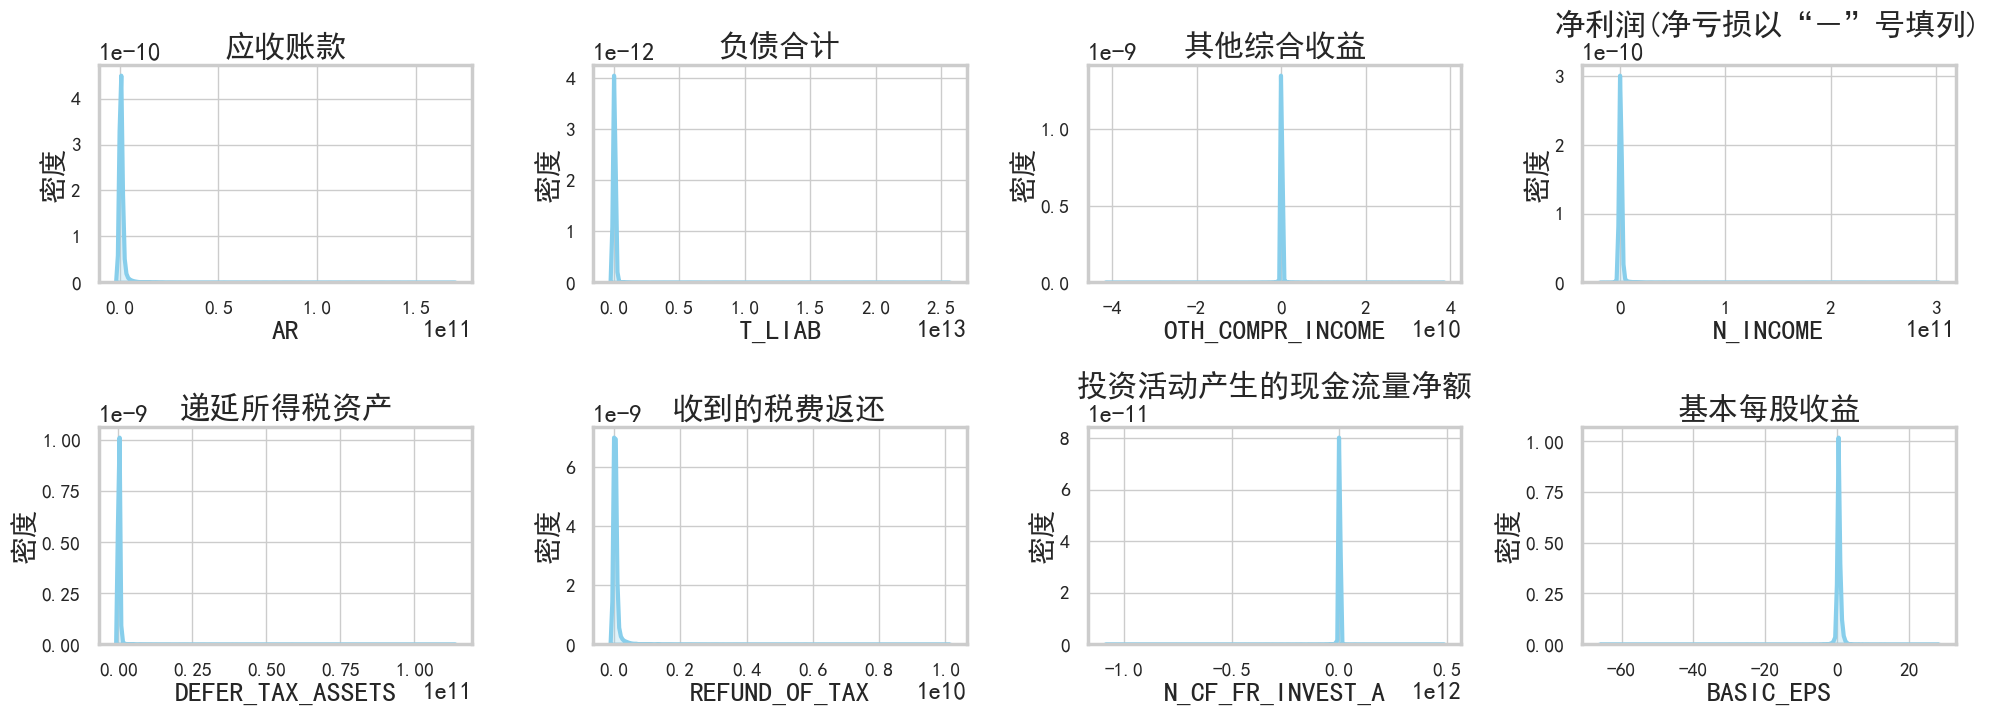

In [29]:
#随机选择8个特征绘制密度图
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from matplotlib.font_manager import FontProperties

# 设置中文字体支持
try:
    # 尝试设置中文字体（根据系统可用字体调整）
    font = FontProperties(fname=r"C:\Windows\Fonts\SimHei.ttf", weight='bold')
except:
    # 如果上述字体不可用，可以使用其他方式设置
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 设置全局字体加粗和放大
plt.rcParams['font.weight'] = 'bold'  # 全局字体加粗
plt.rcParams['axes.titleweight'] = 'bold'  # 标题加粗
plt.rcParams['axes.labelweight'] = 'bold'  # 轴标签加粗
plt.rcParams['xtick.labelsize'] = 18  # 横轴刻度标签大小
plt.rcParams['ytick.labelsize'] = 18  # 纵轴刻度标签大小
plt.rcParams['lines.linewidth'] = 3  # 增加线条粗细
plt.rcParams['axes.linewidth'] = 2  # 增加坐标轴线条粗细
plt.rcParams['axes.titlesize'] = 18  # 设置子图标题字体大小

# 读取数据集
data_path = "output/data_imputed.csv" 
df = pd.read_csv(data_path)  

# 读取特征含义对照表
feature_meanings_path = "data/附件3.xlsx"
feature_meanings = pd.read_excel(feature_meanings_path)
variable_col = '字段名'  
meaning_col = '含义'    

# 创建变量名到含义的映射字典
var_to_meaning = dict(zip(feature_meanings[variable_col], feature_meanings[meaning_col]))

# 获取数据集中所有的数值型特征
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

# 只保留在含义表中有解释的特征
available_features = [f for f in numeric_features if f in var_to_meaning]

# 设置随机种子以便复现
random.seed(43)

# 随机选取8个特征（如果可用特征少于8个，则全部使用）
num_features = min(8, len(available_features))
selected_features = random.sample(available_features, num_features)

# 打印选择的特征名称，以便复现
print("随机选择的8个特征名称：")
for i, feature in enumerate(selected_features):
    meaning = var_to_meaning.get(feature, "无含义描述")
    print(f"{i+1}. {feature} - {meaning}")

# 设置图表样式和大小
plt.style.use('seaborn-whitegrid')

# 设置密度图的颜色 - 天蓝色
density_color = 'skyblue'

# 创建子图布局 - 4列2行
rows = 2
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(20, 8))
axes = axes.flatten()  # 将二维数组展平为一维

# 绘制密度图
for i, feature in enumerate(selected_features):
    # 获取特征数据
    feature_data = df[feature].dropna()
    
    # 检查是否有足够的数据绘图
    if len(feature_data) == 0:
        axes[i].text(0.5, 0.5, f"没有{feature}的有效数据", ha='center', fontsize=14, fontweight='bold')
        continue
    
    # 绘制密度图 - 使用更粗的线条
    density_plot = sns.kdeplot(feature_data, fill=True, color=density_color, ax=axes[i], linewidth=3)
    for l in density_plot.lines:
        l.set_linewidth(3.5)  # 设置线条更粗
    
    # 设置标题为 "变量名 - 含义"
    meaning = var_to_meaning.get(feature, "无含义描述")
    #title = f"{feature} - {meaning}"
    title = f"{meaning}"
    axes[i].set_title(title, fontsize=22, fontweight='extra bold')
    
    # 设置坐标轴标签
    axes[i].set_xlabel(feature, fontsize=20, fontweight='bold')
    axes[i].set_ylabel('密度', fontsize=20, fontweight='bold')
    
    # 设置刻度标签字体大小和粗细
    axes[i].tick_params(axis='both', which='major', labelsize=14, width=2, length=6)
    
    # 加粗轴线
    for spine in axes[i].spines.values():
        spine.set_linewidth(2.5)

# 隐藏未使用的子图
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

# 调整布局
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # 为总标题留出空间

# 设置总标题，加大字体并加粗
#plt.suptitle('随机选取的8个特征密度图', fontsize=24, fontweight='extra bold', y=0.98)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 保存图像
plt.savefig('image/随机选取的8个财务特征的密度图.png', dpi=600, bbox_inches='tight')
plt.show()

# 将选择的特征保存到文件中，以便日后复现
with open('selected_features.txt', 'w', encoding='utf-8') as f:
    f.write('随机选择的8个特征名称：\n')
    for i, feature in enumerate(selected_features):
        meaning = var_to_meaning.get(feature, "无含义描述")
        f.write(f"{i+1}. {feature} - {meaning}\n")

In [64]:
df = pd.read_csv('output/data_imputed.csv')
df

,TICKER_SYMBOL,END_DATE,CASH_C_EQUIV,NOTES_RECEIV,AR,PREPAYMENT,OTH_RECEIV,INVENTORIES,OTH_CA,T_CA,...,N_INCOME,BIZ_TAX_SURCHG,NOPERATE_EXP,GOING_CONCERN_NI,COMPR_INC_ATTR_M_S,INCOME_TAX,NOPERATE_INCOME,MINORITY_GAIN,T_COGS,FLAG
0,4019,1,6.719939e+08,1.643520e+08,3.451945e+08,10395215.35,3.584941e+06,9.372176e+07,2.085943e+08,1.291554e+09,...,1.054685e+08,1.505596e+06,224194.93,0.000000e+00,-2.519763e+05,1.950914e+07,16781651.83,-2.909739e+05,3.885748e+08,0.0
1,4019,2,3.819075e+08,1.517544e+08,2.910801e+08,6944414.85,7.309399e+06,1.466841e+08,5.483637e+07,1.041359e+09,...,5.590150e+07,2.407221e+06,1731795.19,0.000000e+00,-1.630319e+06,1.077268e+07,15995908.21,-1.607622e+06,3.824313e+08,0.0
2,4019,3,4.007627e+08,2.091605e+08,3.656868e+08,13022036.86,4.434665e+07,2.452938e+08,5.340251e+08,1.813378e+09,...,-9.021130e+07,3.213049e+06,640809.85,0.000000e+00,-8.221520e+06,-1.795834e+07,15425901.93,-8.239241e+06,7.362240e+08,0.0
3,4019,4,2.568188e+08,3.306339e+08,6.074095e+08,12264175.43,4.476639e+07,2.374208e+08,2.543391e+08,1.745986e+09,...,4.838242e+07,6.217288e+06,1781992.26,4.838242e+07,-1.149842e+06,6.349171e+06,43263387.96,-1.182665e+06,1.137851e+09,0.0
4,4019,5,1.994519e+09,3.929712e+08,5.351709e+08,49915440.13,4.843317e+07,2.758644e+08,1.050423e+08,3.402048e+09,...,2.105603e+08,9.466278e+06,3002544.67,2.105603e+08,-1.668549e+06,4.157089e+07,2284829.66,-1.680607e+06,9.601421e+08,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20883,4955770,5,3.990889e+07,1.200000e+06,1.133573e+08,6473751.28,6.065782e+06,4.087082e+07,1.035924e+08,3.184274e+08,...,-1.065327e+07,3.755009e+06,1083446.97,-1.065327e+07,-2.251504e+06,1.328246e+07,31442800.79,-2.218909e+06,2.578857e+08,0.0
20884,4955770,6,1.270124e+08,1.837935e+07,1.611597e+08,3405198.44,2.896194e+06,5.589818e+07,5.139555e+06,3.591113e+08,...,6.762086e+06,3.420719e+06,1037894.83,6.762086e+06,1.796213e+04,3.926919e+06,23295.09,2.268548e+04,2.932546e+08,NaN
20885,4958289,5,5.365622e+07,1.832855e+07,7.826347e+07,675822.06,3.366243e+06,5.296673e+07,1.742399e+06,1.906709e+08,...,4.880770e+07,3.346079e+06,5100.00,4.880770e+07,-7.523058e+05,8.878173e+06,3422544.00,-8.501359e+05,1.623486e+08,0.0
20886,4958289,6,5.980404e+07,1.000000e+06,1.179930e+08,1098232.79,6.050578e+06,4.822483e+07,6.497427e+06,2.406681e+08,...,5.271425e+07,3.406210e+06,7407.05,5.271425e+07,-7.712098e+05,9.474993e+06,1625502.07,-7.430429e+05,1.901967e+08,NaN


In [2]:
unique_industries = df['Industry'].unique()

# 打印唯一值
print("行业唯一值：")
for i, industry in enumerate(unique_industries, 1):
    print(f"{i}. {industry}")


行业唯一值：
1. 制造业
2. 批发和零售业
3. 信息传输、软件和信息技术服务业
4. 建筑业
5. 交通运输、仓储和邮政业
6. 采矿业
7. 金融业
8. 农、林、牧、渔业
9. 房地产业
10. 教育
11. 电力、热力、燃气及水生产和供应业
12. 文化、体育和娱乐业
13. 卫生和社会工作
14. 水利、环境和公共设施管理业
15. 科学研究和技术服务业
16. 租赁和商务服务业
17. 综合
18. 住宿和餐饮业
19. 居民服务、修理和其他服务业


### 处理异常值 - IQR - 分行业

In [1]:
# 分行业进行IQR处理，只显示制造业的箱线图
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
df = pd.read_csv('output/data_imputed.csv')

# 定义IQR异常值处理函数 - 只处理数值列，保留其他列不变
def handle_outliers(data, columns):
    data_clean = data.copy()
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data_clean[column] = data_clean[column].clip(lower=lower_bound, upper=upper_bound)
    return data_clean

# 获取数值列（排除FLAG列，但保留它在数据集中）
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = [col for col in numeric_columns if col != 'FLAG']

# 按行业分组处理异常值
df_processed = pd.DataFrame()

# 获取唯一行业列表
industries = df['Industry'].unique()

# 保留原始索引
for industry in industries:
    industry_data = df[df['Industry'] == industry]
    if not industry_data.empty:
        # 只处理数值列的异常值，保留其他列（包括Industry和FLAG）
        cleaned_data = handle_outliers(industry_data, numeric_columns)
        df_processed = pd.concat([df_processed, cleaned_data], sort=False)

                
# 验证处理前后的数据完整性
print(f"原始数据行数: {len(df)}")
print(f"处理后数据行数: {len(df_processed)}")

# 验证Industry和FLAG是否保持一致
original_industries = set(df['Industry'].unique())
processed_industries = set(df_processed['Industry'].unique())
print(f"原始Industry类别数: {len(original_industries)}")
print(f"处理后Industry类别数: {len(processed_industries)}")
print(f"Industry类别是否完全相同: {original_industries == processed_industries}")

if 'FLAG' in df.columns:
    original_flags = set(df['FLAG'].unique())
    processed_flags = set(df_processed['FLAG'].unique())
    print(f"原始FLAG类别数: {len(original_flags)}")
    print(f"处理后FLAG类别数: {len(processed_flags)}")
    print(f"FLAG类别是否完全相同: {original_flags == processed_flags}")
    
    
# 比较前10行数据时，使用索引对齐
print("\n检查前10行数据的Industry和FLAG是否保持一致:")
first_10_indices = df.index[:10]
comparison = pd.DataFrame({
    '原始Industry': df.loc[first_10_indices, 'Industry'].values,
    '处理后Industry': df_processed.loc[first_10_indices, 'Industry'].values
})
if 'FLAG' in df.columns:
    comparison['原始FLAG'] = df.loc[first_10_indices, 'FLAG'].values
    comparison['处理后FLAG'] = df_processed.loc[first_10_indices, 'FLAG'].values
print(comparison)

#FLAG类别是否完全相同: False，是因为有NaN

原始数据行数: 20888
处理后数据行数: 20888
原始Industry类别数: 19
处理后Industry类别数: 19
Industry类别是否完全相同: True
原始FLAG类别数: 3
处理后FLAG类别数: 3
FLAG类别是否完全相同: False

检查前10行数据的Industry和FLAG是否保持一致:
  原始Industry 处理后Industry  原始FLAG  处理后FLAG
0        制造业         制造业     0.0      0.0
1        制造业         制造业     0.0      0.0
2        制造业         制造业     0.0      0.0
3        制造业         制造业     0.0      0.0
4        制造业         制造业     0.0      0.0
5        制造业         制造业     NaN      NaN
6        制造业         制造业     0.0      0.0
7        制造业         制造业     0.0      0.0
8        制造业         制造业     0.0      0.0
9        制造业         制造业     0.0      0.0


### 绘制箱线图 - 制造业

In [2]:
# 制造业的箱线图对比
manufacturing_data = df[df['Industry'] == '制造业']
manufacturing_processed = df_processed[df_processed['Industry'] == '制造业']

# 创建箱线图
def create_boxplots(before_data, after_data, columns, n_cols=3):
    n_rows = (len(columns) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    
    # 确保axes总是一个数组
    if n_rows * n_cols == 1:
        axes = np.array([axes])
    else:
        axes = axes.ravel()
    
    for idx, column in enumerate(columns):
        if idx < len(axes):  # 确保不超出索引
            # 创建数据框来并排显示处理前后的数据
            plot_data = pd.DataFrame({
                '处理前': before_data[column],
                '处理后': after_data[column]
            })
            
            # 使用 seaborn 绘制箱线图
            sns.boxplot(data=plot_data, ax=axes[idx], palette=['lightblue', 'lightgreen'])
            
            axes[idx].set_title(f'{column}', fontsize=12, fontweight='bold')
            axes[idx].tick_params(axis='x', labelsize=10)
            axes[idx].tick_params(axis='y', labelsize=10)
            
            # 改进y轴范围以更好地展示差异
            y_min = min(plot_data['处理前'].min(), plot_data['处理后'].min())
            y_max = max(plot_data['处理前'].max(), plot_data['处理后'].max())
            padding = (y_max - y_min) * 0.1  # 添加10%的边距
            axes[idx].set_ylim(y_min - padding, y_max + padding)
    
    # 隐藏多余的子图
    for idx in range(len(columns), len(axes)):
        if idx < len(axes):
            axes[idx].set_visible(False)
    
    plt.suptitle('制造业特征的异常值处理前后对比', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
    plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号'-'显示为方块的问题
    plt.show()

C:\Users\Danyesiand\AppData\Local\Temp\ipykernel_5216\596461106.py:43: UserWarning: Glyph 22788 (\N{CJK UNIFIED IDEOGRAPH-5904}) missing from current font.
  plt.tight_layout()
C:\Users\Danyesiand\AppData\Local\Temp\ipykernel_5216\596461106.py:43: UserWarning: Glyph 29702 (\N{CJK UNIFIED IDEOGRAPH-7406}) missing from current font.
  plt.tight_layout()
C:\Users\Danyesiand\AppData\Local\Temp\ipykernel_5216\596461106.py:43: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from current font.
  plt.tight_layout()
C:\Users\Danyesiand\AppData\Local\Temp\ipykernel_5216\596461106.py:43: UserWarning: Glyph 21518 (\N{CJK UNIFIED IDEOGRAPH-540E}) missing from current font.
  plt.tight_layout()
C:\Users\Danyesiand\AppData\Local\Temp\ipykernel_5216\596461106.py:43: UserWarning: Glyph 21046 (\N{CJK UNIFIED IDEOGRAPH-5236}) missing from current font.
  plt.tight_layout()
C:\Users\Danyesiand\AppData\Local\Temp\ipykernel_5216\596461106.py:43: UserWarning: Glyph 36896 (\N{CJK UNIFIED IDE

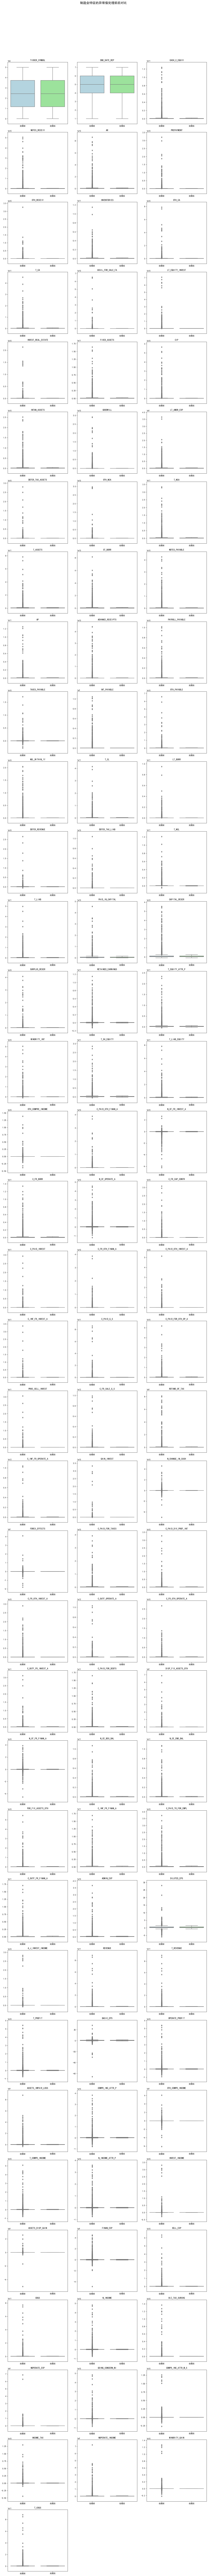

In [4]:
# 选择要绘制的关键指标（根据需要调整）
# key_metrics = [
#     'ROE', 'ROA', 'AssetLiabilityRatio', 'CurrentRatio', 'QuickRatio', 
#     'OperatingIncomeGrowthRate', 'NetProfitGrowthRate', 'GrossProfitMargin', 
#     'InventoryTurnover', 'AccountsReceivableTurnover', 'FixedAssetsTurnover',
#     'TotalAssetsTurnover'
# ]

# 展示所有指标，使用 numeric_columns
# 只想展示部分关键指标，使用 key_metrics
metrics_to_plot = numeric_columns  # 或者 numeric_columns

# 绘制箱线图
create_boxplots(manufacturing_data, manufacturing_processed, metrics_to_plot)


### 打印IQR处理前后的统计信息-制造业

### 输出文件'output/data_outlier_handling_by_industry.csv'

In [6]:
# 打印制造业异常值处理前后的统计信息
print("\n制造业异常值处理前后的统计信息:")
for column in metrics_to_plot:
    before_stats = manufacturing_data[column].describe()
    after_stats = manufacturing_processed[column].describe()
    
    # 计算变化百分比
    change_mean = (after_stats['mean'] - before_stats['mean']) / before_stats['mean'] * 100
    change_std = (after_stats['std'] - before_stats['std']) / before_stats['std'] * 100
    
    print(f"\n{column}:")
    stats_comparison = pd.DataFrame({
        '处理前': before_stats,
        '处理后': after_stats,
        '变化百分比': [np.nan, np.nan, np.nan, np.nan, 
                   change_mean, change_std, np.nan, np.nan]
    })
    print(stats_comparison)

# 保存处理后的数据
df_processed.to_csv('output/data_outlier_handling_by_industry.csv', index=False)
print("\n处理后的数据已保存至 'output/data_outlier_handling_by_industry.csv'")

# 进一步验证处理后的FLAG值是否符合预期
if 'FLAG' in df.columns:
    print("\nFLAG分布检查:")
    print("原始数据FLAG分布:")
    print(df['FLAG'].value_counts())
    print("\n处理后数据FLAG分布:")
    print(df_processed['FLAG'].value_counts())

# 检查行业别的异常值处理效果
print("\n各行业异常值处理统计:")
industry_stats = []

for industry in industries:
    before = df[df['Industry'] == industry]
    after = df_processed[df_processed['Industry'] == industry]
    
    # 计算每个行业的平均标准差变化
    std_changes = []
    for col in numeric_columns:
        if before[col].std() != 0:  # 避免除以零
            change = (after[col].std() - before[col].std()) / before[col].std() * 100
            std_changes.append(change)
    
    avg_std_change = np.mean(std_changes) if std_changes else 0
    
    industry_stats.append({
        '行业': industry,
        '样本数': len(before),
        '平均标准差变化%': avg_std_change
    })

industry_stats_df = pd.DataFrame(industry_stats)
print(industry_stats_df.sort_values('样本数', ascending=False))


制造业异常值处理前后的统计信息:

TICKER_SYMBOL:
                处理前           处理后  变化百分比
count  1.313100e+04  1.313100e+04    NaN
mean   2.465257e+06  2.465257e+06    NaN
std    1.469263e+06  1.469263e+06    NaN
min    4.019000e+03  4.019000e+03    NaN
25%    1.165331e+06  1.165331e+06    0.0
50%    2.436571e+06  2.436571e+06    0.0
75%    3.732111e+06  3.732111e+06    NaN
max    4.999709e+06  4.999709e+06    NaN

END_DATE_REP:
                处理前           处理后  变化百分比
count  13131.000000  13131.000000    NaN
mean       4.753484      4.753484    NaN
std        1.755440      1.755440    NaN
min        1.000000      1.000000    NaN
25%        4.000000      4.000000    0.0
50%        5.000000      5.000000    0.0
75%        6.000000      6.000000    NaN
max        7.000000      7.000000    NaN

CASH_C_EQUIV:
                处理前           处理后      变化百分比
count  1.313100e+04  1.313100e+04        NaN
mean   1.173232e+09  5.501531e+08        NaN
std    4.662443e+09  5.544635e+08        NaN
min    5.605333e+0


ST_BORR:
                处理前           处理后      变化百分比
count  1.313100e+04  1.313100e+04        NaN
mean   8.417925e+08  3.615372e+08        NaN
std    2.786129e+09  4.564545e+08        NaN
min    0.000000e+00  0.000000e+00        NaN
25%    2.276725e+07  2.276725e+07 -57.051499
50%    1.300000e+08  1.300000e+08 -83.616895
75%    5.395072e+08  5.395072e+08        NaN
max    8.168096e+10  1.314617e+09        NaN

NOTES_PAYABLE:
                处理前           处理后      变化百分比
count  1.313100e+04  1.313100e+04        NaN
mean   3.943919e+08  1.414854e+08        NaN
std    1.588422e+09  1.673872e+08        NaN
min    0.000000e+00  0.000000e+00        NaN
25%    2.000852e+07  2.000852e+07 -64.125668
50%    5.718651e+07  5.718651e+07 -89.462044
75%    2.080164e+08  2.080164e+08        NaN
max    4.261552e+10  4.900282e+08        NaN

AP:
                处理前           处理后      变化百分比
count  1.313100e+04  1.313100e+04        NaN
mean   8.512704e+08  3.376462e+08        NaN
std    3.872045e+09  3.7


T_SH_EQUITY:
                处理前           处理后      变化百分比
count  1.313100e+04  1.313100e+04        NaN
mean   3.280257e+09  2.039276e+09        NaN
std    9.210480e+09  1.911019e+09        NaN
min   -4.518853e+09 -2.827621e+09        NaN
25%    5.912634e+08  5.912634e+08 -37.831814
50%    1.312986e+09  1.312986e+09 -79.251692
75%    2.870520e+09  2.870520e+09        NaN
max    2.850000e+11  6.289404e+09        NaN

T_LIAB_EQUITY:
                处理前           处理后      变化百分比
count  1.313100e+04  1.313100e+04        NaN
mean   7.126595e+09  3.696739e+09        NaN
std    2.293803e+10  3.651055e+09        NaN
min    3.051779e+07  3.051779e+07        NaN
25%    9.335545e+08  9.335545e+08 -48.127559
50%    2.145889e+09  2.145889e+09 -84.082960
75%    5.165353e+09  5.165353e+09        NaN
max    7.830000e+11  1.151305e+10        NaN

OTH_COMPRE_INCOME:
                处理前           处理后      变化百分比
count  1.313100e+04  13131.000000        NaN
mean   1.161798e+07   7499.822392        NaN
std  


FOREX_EFFECTS:
                处理前           处理后      变化百分比
count  1.313100e+04  1.313100e+04        NaN
mean   6.017922e+05  1.746822e+05        NaN
std    5.794596e+07  2.158226e+06        NaN
min   -1.798027e+09 -3.540561e+06        NaN
25%   -7.405618e+05 -7.405618e+05 -70.973006
50%    8.073360e+03  8.073360e+03 -96.275450
75%    1.126104e+06  1.126104e+06        NaN
max    4.094504e+09  3.926103e+06        NaN

C_PAID_FOR_TAXES:
                处理前           处理后      变化百分比
count  1.313100e+04  1.313100e+04        NaN
mean   2.784340e+08  1.284932e+08        NaN
std    1.148516e+09  1.287159e+08        NaN
min   -2.018467e+07 -2.018467e+07        NaN
25%    3.361483e+07  3.361483e+07 -53.851484
50%    7.130312e+07  7.130312e+07 -88.792845
75%    1.801303e+08  1.801303e+08        NaN
max    3.924945e+10  3.999036e+08        NaN

C_PAID_DIV_PROF_INT:
                处理前           处理后      变化百分比
count  1.313100e+04  1.313100e+04        NaN
mean   1.867488e+08  8.445709e+07        Na


T_REVENUE:
                处理前           处理后      变化百分比
count  1.313100e+04  1.313100e+04        NaN
mean   5.104631e+09  2.243429e+09        NaN
std    2.209179e+10  2.312898e+09        NaN
min    0.000000e+00  0.000000e+00        NaN
25%    5.359686e+08  5.359686e+08 -56.051117
50%    1.206297e+09  1.206297e+09 -89.530508
75%    3.170265e+09  3.170265e+09        NaN
max    9.020000e+11  7.121710e+09        NaN

T_PROFIT:
                处理前           处理后      变化百分比
count  1.313100e+04  1.313100e+04        NaN
mean   3.626455e+08  1.714512e+08        NaN
std    1.796668e+09  2.060979e+08        NaN
min   -7.385678e+09 -2.710912e+08        NaN
25%    4.724259e+07  4.724259e+07 -52.722092
50%    1.041842e+08  1.041842e+08 -88.528880
75%    2.594651e+08  2.594651e+08        NaN
max    5.434385e+10  5.777989e+08        NaN

BASIC_EPS:
                处理前           处理后      变化百分比
count  13131.000000  13131.000000        NaN
mean       0.425193      0.417643        NaN
std        1.061789 


处理后的数据已保存至 'output/data_outlier_handling_by_industry.csv'

FLAG分布检查:
原始数据FLAG分布:
0.0    16816
1.0      167
Name: FLAG, dtype: int64

处理后数据FLAG分布:
0.0    16816
1.0      167
Name: FLAG, dtype: int64

各行业异常值处理统计:
                  行业    样本数   平均标准差变化%
0                制造业  13131 -87.675769
2    信息传输、软件和信息技术服务业   1689 -85.814957
1             批发和零售业    930 -73.807655
10  电力、热力、燃气及水生产和供应业    634 -73.654756
8               房地产业    631 -77.867298
6                金融业    597 -65.525519
4        交通运输、仓储和邮政业    571 -72.895557
3                建筑业    497 -90.439476
5                采矿业    435 -89.560978
13     水利、环境和公共设施管理业    342 -60.105682
11         文化、体育和娱乐业    327 -45.009351
15          租赁和商务服务业    302 -75.602196
14        科学研究和技术服务业    285 -59.327376
7           农、林、牧、渔业    239 -67.585427
16                综合     96 -45.975084
12           卫生和社会工作     71 -40.549862
17            住宿和餐饮业     56 -58.935660
9                 教育     50 -42.675981
18     居民服务、修理和其他服务业      5 -23.016309


### 可视化异常值处理效果 - 每个行业处理前后的平均标准差 - 柱形图


各行业异常值处理统计:
                  行业      处理前平均标准差      处理后平均标准差
4        交通运输、仓储和邮政业  6.632505e+09  2.031213e+09
17            住宿和餐饮业  1.356508e+09  5.200891e+08
2    信息传输、软件和信息技术服务业  4.254088e+09  2.930843e+08
7           农、林、牧、渔业  1.340845e+09  3.645410e+08
0                制造业  4.151268e+09  4.828606e+08
12           卫生和社会工作  5.496840e+08  4.154498e+08
18     居民服务、修理和其他服务业  4.656377e+07  2.582280e+07
3                建筑业  2.758761e+10  1.545110e+09
8               房地产业  1.407939e+10  2.971845e+09
1             批发和零售业  5.602286e+09  1.581084e+09
9                 教育  4.976812e+08  2.578120e+08
11         文化、体育和娱乐业  9.559169e+08  6.953170e+08
13     水利、环境和公共设施管理业  8.498218e+08  3.676592e+08
10  电力、热力、燃气及水生产和供应业  7.827576e+09  1.930022e+09
14        科学研究和技术服务业  5.278031e+08  2.404949e+08
15          租赁和商务服务业  5.321864e+09  9.979979e+08
16                综合  8.274673e+08  5.199391e+08
5                采矿业  5.928592e+10  2.902962e+09
6                金融业  2.029045e+11  3.039055e+10


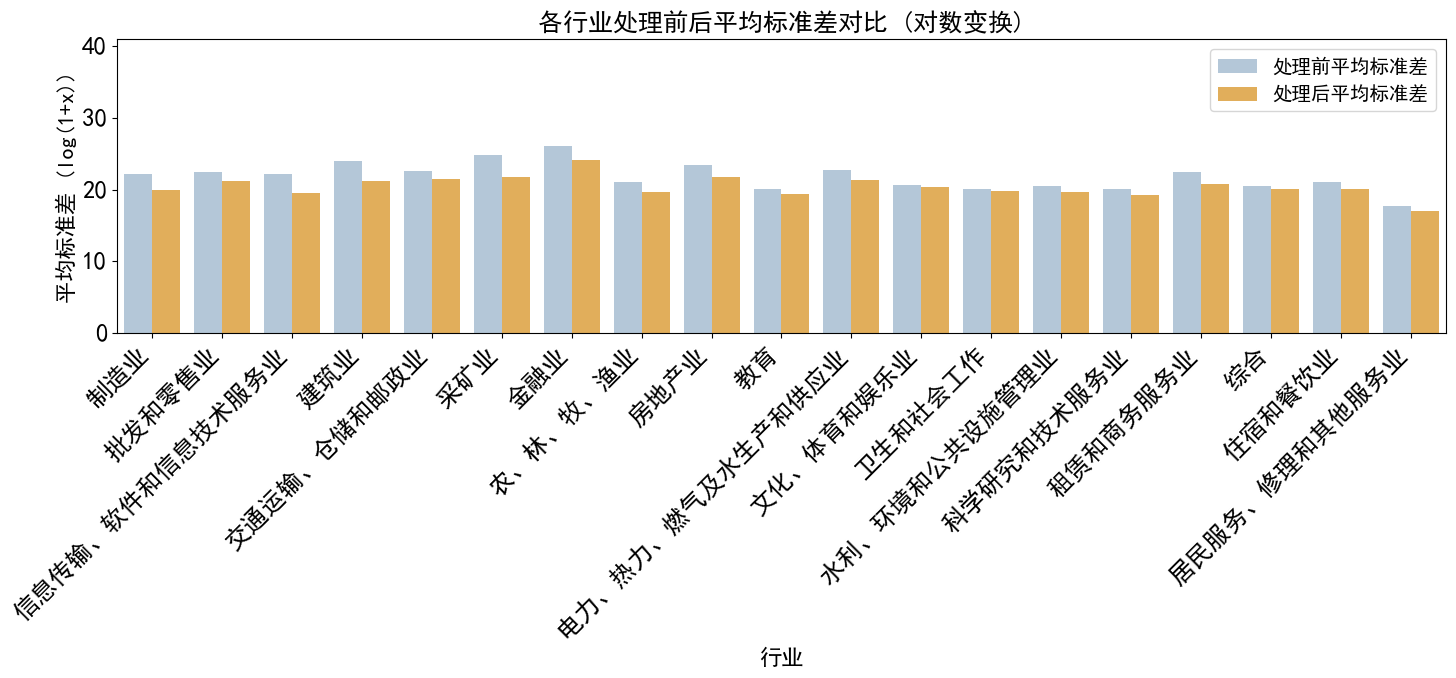

In [7]:
#画条形图
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 设置全局字体大小和粗细
plt.rcParams['font.size'] = 14  # 增大默认字体大小
plt.rcParams['font.weight'] = 'bold'  # 设置字体为粗体
plt.rcParams['axes.labelweight'] = 'bold'  # 设置坐标轴标签为粗体
plt.rcParams['axes.titleweight'] = 'bold'  # 设置标题为粗体

df = pd.read_csv('output/data_imputed.csv')
df_processed = pd.read_csv('output/data_outlier_handling_by_industry.csv')


# 获取唯一行业列表
industries = df['Industry'].unique()
# 获取数值列（排除FLAG列，但保留它在数据集中）
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = [col for col in numeric_columns if col != 'FLAG']

# 检查行业别的异常值处理效果
print("\n各行业异常值处理统计:")
industry_stats = []

# 计算每个行业的平均标准差变化
for industry in industries:
    before = df[df['Industry'] == industry]
    after = df_processed[df_processed['Industry'] == industry]
    
    # 获取每个行业的标准差变化
    before_std_changes = []
    after_std_changes = []
    
    for col in numeric_columns:
        # 计算处理前后的标准差
        before_std = before[col].std()
        after_std = after[col].std()
        
        if before_std != 0:  # 避免除以零
            before_std_changes.append(before_std)
            after_std_changes.append(after_std)
    
    # 计算每个行业的平均标准差
    avg_before_std = np.mean(before_std_changes) if before_std_changes else 0
    avg_after_std = np.mean(after_std_changes) if after_std_changes else 0
    
    industry_stats.append({
        '行业': industry,
        '处理前平均标准差': avg_before_std,
        '处理后平均标准差': avg_after_std
    })

# 转换为 DataFrame
industry_stats_df = pd.DataFrame(industry_stats)

# 输出行业别的标准差变化统计
print(industry_stats_df.sort_values('行业', ascending=True))

# 对数变换处理
plt.figure(figsize=(15, 7))

# 对标准差取对数，避免0值问题
log_industry_stats = industry_stats_df.copy()
log_industry_stats['处理前平均标准差'] = np.log1p(log_industry_stats['处理前平均标准差'])
log_industry_stats['处理后平均标准差'] = np.log1p(log_industry_stats['处理后平均标准差'])

# 绘制对数变换后的条形图
log_data = log_industry_stats.melt(id_vars="行业", 
                                value_vars=["处理前平均标准差", "处理后平均标准差"], 
                                var_name="处理状态", 
                                value_name="平均标准差(对数)")

# 使用天蓝色和橘色作图
sns.barplot(data=log_data, x='行业', y='平均标准差(对数)', hue='处理状态', palette=['#aec8de', '#f7b345'])
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 设置标题和标签字体大小和粗细
plt.title('各行业处理前后平均标准差对比 (对数变换)', fontsize=18, fontweight='bold')
plt.xlabel('行业', fontsize=16, fontweight='bold')
plt.ylabel('平均标准差 (log(1+x))', fontsize=16, fontweight='bold')

# 设置刻度标签的字体大小和粗细
plt.xticks(rotation=45, fontsize=18, fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')

# 设置图例字体大小和粗细
plt.legend(fontsize=14, title_fontproperties={'weight': 'bold'})

plt.gca().set_xticklabels(plt.gca().get_xticklabels(), ha='right')
plt.tight_layout()

# 计算当前y轴的最大值并设置新的上限
y_max = plt.gca().get_ylim()[1]
plt.ylim(0, y_max * 1.5)  # 将上限设为原来的1.5倍

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.savefig('image/各行业处理前后平均标准差对比.png', dpi=600, bbox_inches='tight', facecolor='white')
plt.show()